In [59]:
# Imports
import pandas as pd
import numpy as np
import json as json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [60]:
 # Loading the data from CSV into panadas dataframe
tempIncomeStatement = pd.read_csv (r'../client/data/income_statement.csv', sep=',')
tempCashFlow = pd.read_csv (r'../client/data/cash_flow.csv', sep=',')
tempBalanceSheet = pd.read_csv (r'../client/data/balance-sheet.csv', sep=',')
tempEarnings = pd.read_csv (r'../client/data/EARNINGS.csv', sep=',')

tempMonthly = pd.read_csv (r'../client/data/monthly-data.csv', sep=',')
TickerSymbols = pd.read_csv (r'../client/data/nasdaq_screener_sorted_values.csv', sep=',')

In [61]:
# Printing Income statement
print(tempIncomeStatement)
print(tempIncomeStatement.columns)

# Printing Cash Flow
print(tempCashFlow.shape)
print(tempCashFlow.columns)

# Printing Balance Sheet
print(tempBalanceSheet.shape)
print(tempBalanceSheet.columns)

# Printing Earnings
print(tempEarnings.shape)
print(tempEarnings.columns)

     fiscalDateEnding reportedCurrency  grossProfit  totalRevenue  \
0          2021-09-30              USD  35174000000   82688000000   
1          2021-06-30              USD  35255000000   80769000000   
2          2021-03-31              USD  38079000000   88914000000   
3          2020-12-31              USD  44328000000  110801000000   
4          2020-09-30              USD  24689000000   64698000000   
...               ...              ...          ...           ...   
3899       2017-05-31              USD    345500000     572700000   
3900       2017-02-28              USD    325900000     566400000   
3901       2016-11-30              USD    356900000     623700000   
3902       2016-08-31              USD    326900000     597300000   
3903       2016-05-31              USD    248800000     710500000   

     costOfRevenue costofGoodsAndServicesSold operatingIncome  \
0      53802000000                48186000000     23786000000   
1      51591000000                4617900

In [62]:
# renaming Balance sheet column "fiscalDateEnding" to "timestamp" to match column name on both dataframes
tempIncomeStatement = tempIncomeStatement.rename(columns={"fiscalDateEnding": "timestamp"})
tempCashFlow = tempCashFlow.rename(columns={"fiscalDateEnding": "timestamp"})
tempBalanceSheet = tempBalanceSheet.rename(columns={"fiscalDateEnding": "timestamp"})
tempEarnings = tempEarnings.rename(columns={"fiscalDateEnding": "timestamp"})

# Merging all 4 frames into one

# Daily dates does not overlap on both dataframes, CompanyMonthly has the last trading day (not including weekends)
# While CompanyBalanaceSheet always has the last day of the month (including weekends)
# We need to cut out the daily date for both dataframes["timestamp"], to be able to merge them properly.
# Slicing the timestamp in CompanyMonthly, removing the days
sliceMonthly = tempMonthly["timestamp"].str.slice(0, -3)
tempMonthly["timestamp"] = sliceMonthly

# Printing
print("Monthly Data:")
print(tempMonthly["timestamp"])

# Slicing the timestamp in Income Statement, removing the days
sliceIncomestatement = tempIncomeStatement["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempIncomeStatement["timestamp"] = sliceIncomestatement

# Slicing the timestamp in Cash Flow, removing the days
sliceCashFlow = tempCashFlow["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempCashFlow["timestamp"] = sliceCashFlow

# Slicing the timestamp in CompanyBalanceSheet, removing the days
sliceBalanceSheet = tempBalanceSheet["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempBalanceSheet["timestamp"] = sliceBalanceSheet

# Slicing the timestamp in Earnings, removing the days
sliceEarnings = tempEarnings["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempEarnings["timestamp"] = sliceEarnings

# Printing
print("Income Statement:")
print(tempIncomeStatement["timestamp"])
print("Cash Flow:")
print(tempCashFlow["timestamp"])
print("Balance Sheet:")
print(tempBalanceSheet["timestamp"])
print("Earnings:")
print(tempEarnings["timestamp"])
print("Ticker Symbols:")
print(TickerSymbols["Symbol"])
    

Monthly Data:
0        2021-11
1        2021-10
2        2021-09
3        2021-08
4        2021-07
          ...   
43662    2000-11
43663    2000-10
43664    2000-09
43665    2000-08
43666    2000-07
Name: timestamp, Length: 43667, dtype: object
Income Statement:
0       2021-09
1       2021-06
2       2021-03
3       2020-12
4       2020-09
         ...   
3899    2017-05
3900    2017-02
3901    2016-11
3902    2016-08
3903    2016-05
Name: timestamp, Length: 3904, dtype: object
Cash Flow:
0       2021-09
1       2021-06
2       2021-03
3       2020-12
4       2020-09
         ...   
3880    2017-05
3881    2017-02
3882    2016-11
3883    2016-08
3884    2016-05
Name: timestamp, Length: 3885, dtype: object
Balance Sheet:
0       2021-09
1       2021-06
2       2021-03
3       2020-12
4       2020-09
         ...   
3852    2017-05
3853    2017-02
3854    2016-11
3855    2016-08
3856    2016-05
Name: timestamp, Length: 3857, dtype: object
Earnings:
0        2021-09
1        2021-06
2 

In [63]:
# for each company we want to make adjustments needed for each companys features and then we will merge them into one df
TickerSymbols = TickerSymbols[~TickerSymbols['Symbol'].isin(['RIVN'])]
final_df = pd.DataFrame()

for tickerSymbol in TickerSymbols["Symbol"]:
    
    # filter all dataframes for each ticketsymbol (stock)
    CompanyIncomeStatement = tempIncomeStatement.loc[tempIncomeStatement["symbol"] == tickerSymbol]
    CompanyCashFlow = tempCashFlow.loc[tempCashFlow["symbol"] == tickerSymbol]
    CompanyBalanceSheet = tempBalanceSheet.loc[tempBalanceSheet["symbol"] == tickerSymbol]
    CompanyEarnings = tempEarnings.loc[tempEarnings["symbol"] == tickerSymbol]
    CompanyMonthly = tempMonthly.loc[tempMonthly["Symbol"] == tickerSymbol]
    
    # Removing symbol for all Company dataframes
    CompanyIncomeStatement.drop(["reportedCurrency", "symbol"], axis=1, inplace=True)
    CompanyCashFlow.drop(["reportedCurrency", 'symbol'], axis=1, inplace=True)
    CompanyBalanceSheet.drop(["reportedCurrency", 'symbol'], axis=1, inplace=True)
    CompanyEarnings.drop(['symbol', 'reportedDate'], axis=1, inplace=True)
    #CompanyMonthly.drop(['Symbol'], axis=1, inplace=True)

    # Cutting out unecessary data from the CompanyMonthly
    # We only need price data in CompanyMonthly within the daterange of the 20 rows on CompanyBalanceSheet data
    # every row is 3 months in CompanyBalanceSheet. Every row in CompanyMonthly is 1 month, 3x20 = 60.
    # !!!! NOt using 3m labels anymore, but keeping the code, it doesn't make a difference.
    idx = (CompanyMonthly.index[0]+60)
    CompanyMonthly = CompanyMonthly.loc[:idx]

    # calculating 1 month labels
    CompanyMonthly["1m"] = CompanyMonthly["close"].pct_change(periods = -1).shift(periods = 1)
    cat =  ["timestamp", "1m"]
    
    # merge all df into a temp df
    temp_df = pd.merge(CompanyIncomeStatement, CompanyCashFlow, how="outer", on = "timestamp")
    temp_df = pd.merge(temp_df, CompanyBalanceSheet, how="outer", on = "timestamp")
    temp_df = pd.merge(temp_df, CompanyEarnings, how="outer", on = "timestamp")
    
    # merging the rows from balance sheet and monthly on timestamp.
    merged_df = pd.merge(temp_df, CompanyMonthly, how="outer", on = "timestamp")
    
    # removing the rows over 20
    merged_df = merged_df.loc[:19]

    # calculate how much the increase is in percentage, interval of 3 months
    # also offsetting by 1, to get the labels on the correct row.
    #merged_df["3m"] = merged_df["close"].pct_change(periods = -1).shift(periods = 1)
    
    # Removing the first row, because we do not have a label for it, 3 months have not passed yet for us to get the end price of the 3 month cycle
    #merged_df.drop(index=merged_df.index[0], axis=0, inplace=True)

    # Also dropping columns that we do not need, symbol, Symbol, open, high, low, close, volume etc.
    merged_df.drop(['open','high','low','volume', "close"], axis=1, inplace=True)

    # replacing all "None" strings with NaN data type
    merged_df = merged_df.replace('None', np.nan)
    
    for col in merged_df.columns:
        if col != "Symbol":
            if col != "timestamp":
                if col != "1m":
                    merged_df[col] = merged_df[col].astype("float")
                    merged_df[col] = merged_df[col].replace(-np.inf, np.nan) 
                    merged_df[col] = merged_df[col].replace(np.inf, np.nan) 
                    merged_df[col] = merged_df[col].replace(np.nan, merged_df[col].mean()) 
                    merged_df[col] = merged_df[col].pct_change(periods = -1).shift(periods = 0)
    #print(merged_df[cat].head(21))

    # adding it to the final dataframe
    #print(str(col) + " Percentage difference: ")
    #print(merged_df.head(10))
    
    #merged_df.drop(index=merged_df.index[-1], axis=0, inplace=True)
    cat =  ["timestamp", "1m", "Symbol"]
    print(merged_df[cat].head(21))
    final_df = pd.concat([final_df, merged_df], axis=0)

# randomizing the dataframe rows and resting index
final_df = final_df.sample(frac=1).reset_index(drop=True)


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.058657   AAPL
1    2021-06  0.064982   AAPL
2    2021-03  0.076218   AAPL
3    2020-12 -0.005502   AAPL
4    2020-09 -0.060012   AAPL
5    2020-06  0.165132   AAPL
6    2020-03  0.155374   AAPL
7    2019-12  0.054010   AAPL
8    2019-09  0.110684   AAPL
9    2019-06  0.076395   AAPL
10   2019-03  0.056436   AAPL
11   2018-12  0.055154   AAPL
12   2018-09 -0.030478   AAPL
13   2018-06  0.027983   AAPL
14   2018-03 -0.015020   AAPL
15   2017-12 -0.010636   AAPL
16   2017-09  0.096808   AAPL
17   2017-06  0.032704   AAPL
18   2017-03 -0.000070   AAPL
19   2016-12  0.047747   AAPL


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.176291   MSFT
1    2021-06  0.051717   MSFT
2    2021-03  0.069602   MSFT
3    2020-12  0.042892   MSFT
4    2020-09 -0.037370   MSFT
5    2020-06  0.007371   MSFT
6    2020-03  0.136326   MSFT
7    2019-12  0.079455   MSFT
8    2019-09  0.031216   MSFT
9    2019-06  0.017244   MSFT
10   2019-03  0.107343   MSFT
11   2018-12  0.028158   MSFT
12   2018-09 -0.066101   MSFT
13   2018-06  0.075753   MSFT
14   2018-03  0.024652   MSFT
15   2017-12  0.110708   MSFT
16   2017-09  0.116660   MSFT
17   2017-06  0.054693   MSFT
18   2017-03  0.039478   MSFT
19   2016-12  0.040393   MSFT


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.112595   GOOG
1    2021-06  0.079040   GOOG
2    2021-03  0.165080   GOOG
3    2020-12  0.047869   GOOG
4    2020-09  0.103028   GOOG
5    2020-06  0.049059   GOOG
6    2020-03  0.159828   GOOG
7    2019-12  0.072706   GOOG
8    2019-09  0.033724   GOOG
9    2019-06  0.125607   GOOG
10   2019-03  0.012929   GOOG
11   2018-12  0.077983   GOOG
12   2018-09 -0.097782   GOOG
13   2018-06  0.091077   GOOG
14   2018-03 -0.014014   GOOG
15   2017-12  0.118062   GOOG
16   2017-09  0.059983   GOOG
17   2017-06  0.023957   GOOG
18   2017-03  0.092097   GOOG
19   2016-12  0.032352   GOOG


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.107499  GOOGL
1    2021-06  0.103506  GOOGL
2    2021-03  0.141080  GOOGL
3    2020-12  0.042633  GOOGL
4    2020-09  0.102695  GOOGL
5    2020-06  0.049293  GOOGL
6    2020-03  0.159000  GOOGL
7    2019-12  0.069726  GOOGL
8    2019-09  0.030840  GOOGL
9    2019-06  0.125046  GOOGL
10   2019-03  0.018753  GOOGL
11   2018-12  0.077448  GOOGL
12   2018-09 -0.096514  GOOGL
13   2018-06  0.086814  GOOGL
14   2018-03 -0.017895  GOOGL
15   2017-12  0.122290  GOOGL
16   2017-09  0.060921  GOOGL
17   2017-06  0.017017  GOOGL
18   2017-03  0.090493  GOOGL
19   2016-12  0.035005  GOOGL


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.026602   AMZN
1    2021-06 -0.032722   AMZN
2    2021-03  0.120663   AMZN
3    2020-12 -0.015576   AMZN
4    2020-09 -0.035754   AMZN
5    2020-06  0.147114   AMZN
6    2020-03  0.268900   AMZN
7    2019-12  0.087064   AMZN
8    2019-09  0.023475   AMZN
9    2019-06 -0.014179   AMZN
10   2019-03  0.081859   AMZN
11   2018-12  0.144317   AMZN
12   2018-09 -0.202192   AMZN
13   2018-06  0.045676   AMZN
14   2018-03  0.082075   AMZN
15   2017-12  0.240639   AMZN
16   2017-09  0.149717   AMZN
17   2017-06  0.020434   AMZN
18   2017-03  0.043371   AMZN
19   2016-12  0.098164   AMZN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.436530   TSLA
1    2021-06  0.011034   TSLA
2    2021-03  0.062147   TSLA
3    2020-12  0.124506   TSLA
4    2020-09 -0.095499   TSLA
5    2020-06  0.325011   TSLA
6    2020-03  0.492137   TSLA
7    2019-12  0.555160   TSLA
8    2019-09  0.307427   TSLA
9    2019-06  0.081223   TSLA
10   2019-03 -0.147109   TSLA
11   2018-12 -0.077464   TSLA
12   2018-09  0.274011   TSLA
13   2018-06 -0.130660   TSLA
14   2018-03  0.104347   TSLA
15   2017-12  0.137980   TSLA
16   2017-09 -0.028056   TSLA
17   2017-06 -0.105473   TSLA
18   2017-03  0.128530   TSLA
19   2016-12  0.178951   TSLA


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.046613     FB
1    2021-06  0.024704     FB
2    2021-03  0.103725     FB
3    2020-12 -0.054291     FB
4    2020-09  0.004620     FB
5    2020-06  0.117144     FB
6    2020-03  0.227278     FB
7    2019-12 -0.016273     FB
8    2019-09  0.076202     FB
9    2019-06  0.006373     FB
10   2019-03  0.160238     FB
11   2018-12  0.271569     FB
12   2018-09 -0.077040     FB
13   2018-06 -0.111877     FB
14   2018-03  0.076413     FB
15   2017-12  0.059107     FB
16   2017-09  0.053784     FB
17   2017-06  0.121009     FB
18   2017-03  0.057726     FB
19   2016-12  0.132725     FB


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-10  0.290140   NVDA
1    2021-08 -0.074559   NVDA
2    2021-05  0.231340   NVDA
3    2021-01  0.055794   NVDA
4    2020-10  0.069212   NVDA
5    2020-07  0.259992   NVDA
6    2020-04  0.214657   NVDA
7    2020-01  0.142283   NVDA
8    2019-10  0.078201   NVDA
9    2019-07 -0.007172   NVDA
10   2019-04 -0.251602   NVDA
11   2019-01  0.073113   NVDA
12   2018-10 -0.224826   NVDA
13   2018-07  0.146288   NVDA
14   2018-04  0.121343   NVDA
15   2018-01 -0.015460   NVDA
16   2017-10 -0.029496   NVDA
17   2017-07  0.042644   NVDA
18   2017-04  0.383988   NVDA
19   2017-01 -0.070526   NVDA


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.018361    TSM
1    2021-06 -0.029294    TSM
2    2021-03 -0.013020    TSM
3    2020-12  0.114453    TSM
4    2020-09  0.034538    TSM
5    2020-06  0.389642    TSM
6    2020-03  0.111739    TSM
7    2019-12 -0.071601    TSM
8    2019-09  0.110800    TSM
9    2019-06  0.088333    TSM
10   2019-03  0.069824    TSM
11   2018-12  0.019236    TSM
12   2018-09 -0.137228    TSM
13   2018-06  0.127188    TSM
14   2018-03 -0.121344    TSM
15   2017-12  0.142749    TSM
16   2017-09  0.127297    TSM
17   2017-06  0.028604    TSM
18   2017-03  0.007004    TSM
19   2016-12  0.075130    TSM


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.037876    JPM
1    2021-06 -0.024174    JPM
2    2021-03  0.010379    JPM
3    2020-12  0.012591    JPM
4    2020-09  0.018386    JPM
5    2020-06  0.027429    JPM
6    2020-03  0.063645    JPM
7    2019-12 -0.050502    JPM
8    2019-09  0.061433    JPM
9    2019-06  0.037567    JPM
10   2019-03  0.146399    JPM
11   2018-12  0.060234    JPM
12   2018-09 -0.033853    JPM
13   2018-06  0.103167    JPM
14   2018-03 -0.010821    JPM
15   2017-12  0.081635    JPM
16   2017-09  0.053398    JPM
17   2017-06  0.004376    JPM
18   2017-03 -0.009563    JPM
19   2016-12 -0.019237    JPM


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.049293      V
1    2021-06  0.053759      V
2    2021-03  0.103103      V
3    2020-12 -0.116491      V
4    2020-09 -0.091314      V
5    2020-06 -0.014340      V
6    2020-03  0.109235      V
7    2019-12  0.058914      V
8    2019-09  0.039823      V
9    2019-06  0.025641      V
10   2019-03  0.052756      V
11   2018-12  0.023268      V
12   2018-09 -0.081551      V
13   2018-06  0.032390      V
14   2018-03  0.060692      V
15   2017-12  0.089546      V
16   2017-09  0.045040      V
17   2017-06  0.061634      V
18   2017-03  0.026443      V
19   2016-12  0.060113      V


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.008545    JNJ
1    2021-06  0.045283    JNJ
2    2021-03 -0.009857    JNJ
3    2020-12  0.036536    JNJ
4    2020-09 -0.079057    JNJ
5    2020-06  0.036479    JNJ
6    2020-03  0.144208    JNJ
7    2019-12  0.020566    JNJ
8    2019-09  0.020560    JNJ
9    2019-06 -0.065049    JNJ
10   2019-03  0.010087    JNJ
11   2018-12  0.031228    JNJ
12   2018-09  0.013172    JNJ
13   2018-06  0.092138    JNJ
14   2018-03 -0.012954    JNJ
15   2017-12 -0.010950    JNJ
16   2017-09  0.072302    JNJ
17   2017-06  0.003250    JNJ
18   2017-03 -0.008671    JNJ
19   2016-12 -0.017012    JNJ


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.178456    UNH
1    2021-06  0.029418    UNH
2    2021-03  0.071841    UNH
3    2020-12 -0.048762    UNH
4    2020-09 -0.021266    UNH
5    2020-06  0.026547    UNH
6    2020-03  0.172789    UNH
7    2019-12 -0.073236    UNH
8    2019-09  0.162801    UNH
9    2019-06  0.020491    UNH
10   2019-03 -0.057389    UNH
11   2018-12  0.084618    UNH
12   2018-09 -0.017629    UNH
13   2018-06  0.032119    UNH
14   2018-03  0.104673    UNH
15   2017-12  0.074027    UNH
16   2017-09  0.073372    UNH
17   2017-06  0.034462    UNH
18   2017-03  0.066276    UNH
19   2016-12  0.012872    UNH


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-10  0.099397     HD
1    2021-08  0.006377     HD
2    2021-05 -0.000063     HD
3    2021-01 -0.046082     HD
4    2020-11 -0.042500     HD
5    2020-08 -0.025716     HD
6    2020-05  0.008170     HD
7    2020-02 -0.142903     HD
8    2019-11 -0.009659     HD
9    2019-08  0.018033     HD
10   2019-05  0.095444     HD
11   2019-02  0.036459     HD
12   2018-10  0.025244     HD
13   2018-07  0.016454     HD
14   2018-04  0.009470     HD
15   2018-01 -0.092733     HD
16   2017-10  0.084691     HD
17   2017-07  0.001805     HD
18   2017-04 -0.016592     HD
19   2017-01  0.053278     HD


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-07 -0.026699    ADI
1    2021-05  0.045930    ADI
2    2021-01  0.057626    ADI
3    2020-10  0.173374    ADI
4    2020-08 -0.001198    ADI
5    2020-05  0.085790    ADI
6    2020-02 -0.177900    ADI
7    2019-11  0.052147    ADI
8    2019-08  0.017299    ADI
9    2019-05  0.168185    ADI
10   2019-02 -0.015800    ADI
11   2018-11 -0.066253    ADI
12   2018-08 -0.064643    ADI
13   2018-05 -0.012966    ADI
14   2018-02  0.010871    ADI
15   2017-10 -0.056846    ADI
16   2017-07  0.058980    ADI
17   2017-04  0.125459    ADI
18   2017-01  0.093275    ADI
19   2016-10       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.125559    BAC
1    2021-06 -0.069610    BAC
2    2021-03  0.047558    BAC
3    2020-12 -0.021775    BAC
4    2020-09 -0.016189    BAC
5    2020-06  0.047579    BAC
6    2020-03  0.132831    BAC
7    2019-12 -0.067859    BAC
8    2019-09  0.071992    BAC
9    2019-06  0.057931    BAC
10   2019-03  0.108373    BAC
11   2018-12  0.155438    BAC
12   2018-09 -0.066531    BAC
13   2018-06  0.095424    BAC
14   2018-03 -0.002334    BAC
15   2017-12  0.084011    BAC
16   2017-09  0.080900    BAC
17   2017-06 -0.005771    BAC
18   2017-03 -0.010598    BAC
19   2016-12  0.024434    BAC


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-07  0.038934    WMT
1    2021-04  0.015153    WMT
2    2021-01 -0.075237    WMT
3    2020-10  0.101189    WMT
4    2020-07  0.073029    WMT
5    2020-04  0.020650    WMT
6    2020-01 -0.059481    WMT
7    2019-10  0.015606    WMT
8    2019-07  0.035151    WMT
9    2019-04 -0.013613    WMT
10   2019-01  0.032975    WMT
11   2018-10 -0.026227    WMT
12   2018-07  0.074302    WMT
13   2018-04 -0.066923    WMT
14   2018-01 -0.155629    WMT
15   2017-10  0.113618    WMT
16   2017-07 -0.024003    WMT
17   2017-04  0.045491    WMT
18   2017-01  0.062781    WMT
19   2016-10       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.114083   BABA
1    2021-06 -0.139298   BABA
2    2021-03  0.018612   BABA
3    2020-12  0.090663   BABA
4    2020-09  0.036431   BABA
5    2020-06  0.163746   BABA
6    2020-03  0.042112   BABA
7    2019-12 -0.025978   BABA
8    2019-09  0.056449   BABA
9    2019-06  0.021599   BABA
10   2019-03  0.017101   BABA
11   2018-12  0.229226   BABA
12   2018-09 -0.136441   BABA
13   2018-06  0.009163   BABA
14   2018-03 -0.027242   BABA
15   2017-12  0.184771   BABA
16   2017-09  0.070523   BABA
17   2017-06  0.099716   BABA
18   2017-03  0.071130   BABA
19   2016-12  0.153741   BABA


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.090953   ASML
1    2021-06  0.109866   ASML
2    2021-03  0.049793   ASML
3    2020-12  0.095219   ASML
4    2020-09 -0.021827   ASML
5    2020-06 -0.038883   ASML
6    2020-03  0.102393   ASML
7    2019-12 -0.051632   ASML
8    2019-09  0.054545   ASML
9    2019-06  0.071563   ASML
10   2019-03  0.110449   ASML
11   2018-12  0.124727   ASML
12   2018-09 -0.083289   ASML
13   2018-06  0.080972   ASML
14   2018-03 -0.050917   ASML
15   2017-12  0.167645   ASML
16   2017-09  0.055783   ASML
17   2017-06  0.153634   ASML
18   2017-03 -0.007154   ASML
19   2016-12  0.081996   ASML


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.022818     PG
1    2021-06  0.054102     PG
2    2021-03 -0.014842     PG
3    2020-12 -0.078554     PG
4    2020-09 -0.013598     PG
5    2020-06  0.096596     PG
6    2020-03  0.071545     PG
7    2019-12 -0.002242     PG
8    2019-09  0.001045     PG
9    2019-06  0.076516     PG
10   2019-03  0.023354     PG
11   2018-12  0.049500     PG
12   2018-09  0.065481     PG
13   2018-06  0.036126     PG
14   2018-03 -0.087538     PG
15   2017-12 -0.060296     PG
16   2017-09 -0.051000     PG
17   2017-06  0.042111     PG
18   2017-03 -0.028047     PG
19   2016-12  0.041865     PG


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.034975     MA
1    2021-06  0.057109     MA
2    2021-03  0.073052     MA
3    2020-12 -0.113885     MA
4    2020-09 -0.146465     MA
5    2020-06  0.043389     MA
6    2020-03  0.138309     MA
7    2019-12  0.058106     MA
8    2019-09  0.019295     MA
9    2019-06  0.029259     MA
10   2019-03  0.079805     MA
11   2018-12  0.119162     MA
12   2018-09 -0.112034     MA
13   2018-06  0.007531     MA
14   2018-03  0.017755     MA
15   2017-12  0.116543     MA
16   2017-09  0.053612     MA
17   2017-06  0.052285     MA
18   2017-03  0.034231     MA
19   2016-12  0.029831     MA


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.129646   ADBE
1    2021-06  0.061454   ADBE
2    2021-03  0.069357   ADBE
3    2020-11  0.045248   ADBE
4    2020-08 -0.044722   ADBE
5    2020-05  0.125996   ADBE
6    2020-02 -0.077886   ADBE
7    2019-11  0.065519   ADBE
8    2019-08 -0.029032   ADBE
9    2019-05  0.087671   ADBE
10   2019-03  0.085407   ADBE
11   2018-11 -0.098250   ADBE
12   2018-08  0.024439   ADBE
13   2018-06  0.003568   ADBE
14   2018-03  0.025546   ADBE
15   2017-12  0.139922   ADBE
16   2017-09  0.174152   ADBE
17   2017-06  0.035704   ADBE
18   2017-03  0.027741   ADBE
19   2016-12  0.101311   ADBE


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.131025   NFLX
1    2021-06 -0.020144   NFLX
2    2021-03 -0.015700   NFLX
3    2020-12 -0.015424   NFLX
4    2020-09 -0.048577   NFLX
5    2020-06  0.074367   NFLX
6    2020-03  0.118109   NFLX
7    2019-12  0.066508   NFLX
8    2019-09  0.073948   NFLX
9    2019-06 -0.120685   NFLX
10   2019-03  0.039208   NFLX
11   2018-12  0.268400   NFLX
12   2018-09 -0.193382   NFLX
13   2018-06 -0.137905   NFLX
14   2018-03  0.057931   NFLX
15   2017-12  0.408106   NFLX
16   2017-09  0.083154   NFLX
17   2017-06  0.215849   NFLX
18   2017-03  0.029700   NFLX
19   2016-12  0.136591   NFLX


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.142740   NTES
1    2021-06 -0.113145   NTES
2    2021-03  0.085222   NTES
3    2020-12  0.200689   NTES
4    2020-09 -0.809114   NTES
5    2020-06  0.067632   NTES
6    2020-03  0.074776   NTES
7    2019-12  0.046047   NTES
8    2019-09  0.073935   NTES
9    2019-06 -0.097549   NTES
10   2019-03  0.178422   NTES
11   2018-12  0.070357   NTES
12   2018-09 -0.089376   NTES
13   2018-06  0.021095   NTES
14   2018-03 -0.083170   NTES
15   2017-12 -0.072188   NTES
16   2017-09  0.068648   NTES
17   2017-06  0.035426   NTES
18   2017-03 -0.065528   NTES
19   2016-12  0.179066   NTES


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-07  0.096474    CRM
1    2021-04  0.033779    CRM
2    2021-01 -0.040167    CRM
3    2020-10  0.058251    CRM
4    2020-07  0.399281    CRM
5    2020-04  0.079284    CRM
6    2020-01 -0.065328    CRM
7    2019-10  0.040897    CRM
8    2019-07  0.010162    CRM
9    2019-04 -0.084306    CRM
10   2019-01  0.076857    CRM
11   2018-10  0.040222    CRM
12   2018-07  0.113234    CRM
13   2018-04  0.068931    CRM
14   2018-01  0.020543    CRM
15   2017-10  0.019347    CRM
16   2017-07  0.051652    CRM
17   2017-04  0.040873    CRM
18   2017-01  0.028445    CRM
19   2016-10       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.016973    PFE
1    2021-06  0.093207    PFE
2    2021-03  0.066795    PFE
3    2020-12 -0.024722    PFE
4    2020-09 -0.033243    PFE
5    2020-06  0.176758    PFE
6    2020-03  0.175245    PFE
7    2019-12 -0.049515    PFE
8    2019-09  0.067910    PFE
9    2019-06 -0.103416    PFE
10   2019-03 -0.043796    PFE
11   2018-12 -0.027491    PFE
12   2018-09 -0.022918    PFE
13   2018-06  0.100606    PFE
14   2018-03  0.031558    PFE
15   2017-12  0.022639    PFE
16   2017-09 -0.017927    PFE
17   2017-06 -0.012801    PFE
18   2017-03 -0.008477    PFE
19   2016-12 -0.023091    PFE


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.000591    DIS
1    2021-06  0.001422    DIS
2    2021-03  0.008129    DIS
3    2020-12 -0.071807    DIS
4    2020-09 -0.022808    DIS
5    2020-06  0.048695    DIS
6    2020-03  0.119565    DIS
7    2019-12 -0.043698    DIS
8    2019-09 -0.003069    DIS
9    2019-06  0.024133    DIS
10   2019-03  0.233631    DIS
11   2018-12  0.017054    DIS
12   2018-09 -0.018043    DIS
13   2018-06  0.083484    DIS
14   2018-03 -0.001095    DIS
15   2017-12  0.010790    DIS
16   2017-09 -0.007710    DIS
17   2017-06  0.034635    DIS
18   2017-03  0.019490    DIS
19   2016-12  0.061696    DIS


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-08 -0.118429    NKE
1    2021-05  0.132127    NKE
2    2021-02 -0.014023    NKE
3    2020-11  0.050260    NKE
4    2020-08  0.121995    NKE
5    2020-05 -0.005376    NKE
6    2020-02 -0.074290    NKE
7    2019-11  0.083645    NKE
8    2019-08  0.111479    NKE
9    2019-05  0.088281    NKE
10   2019-02 -0.017730    NKE
11   2018-11 -0.013046    NKE
12   2018-08  0.030657    NKE
13   2018-05  0.109749    NKE
14   2018-02 -0.008802    NKE
15   2017-11  0.035253    NKE
16   2017-08 -0.018178    NKE
17   2017-05  0.113418    NKE
18   2017-02 -0.025017    NKE
19   2016-11  0.015179    NKE


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.096056    XOM
1    2021-06 -0.087349    XOM
2    2021-03  0.025255    XOM
3    2020-12  0.087821    XOM
4    2020-09 -0.049811    XOM
5    2020-06 -0.059034    XOM
6    2020-03  0.223861    XOM
7    2019-12 -0.109774    XOM
8    2019-09 -0.043053    XOM
9    2019-06 -0.029623    XOM
10   2019-03 -0.006436    XOM
11   2018-12  0.074644    XOM
12   2018-09 -0.062809    XOM
13   2018-06 -0.014747    XOM
14   2018-03  0.042086    XOM
15   2017-12  0.043759    XOM
16   2017-09  0.016711    XOM
17   2017-06 -0.008547    XOM
18   2017-03 -0.004390    XOM
19   2016-12 -0.070574    XOM


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.147068    NVO
1    2021-06  0.105408    NVO
2    2021-03  0.096856    NVO
3    2020-12 -0.003579    NVO
4    2020-09 -0.079793    NVO
5    2020-06 -0.002291    NVO
6    2020-03  0.051993    NVO
7    2019-12  0.050968    NVO
8    2019-09  0.068085    NVO
9    2019-06 -0.061129    NVO
10   2019-03 -0.063085    NVO
11   2018-12  0.020621    NVO
12   2018-09 -0.084005    NVO
13   2018-06  0.079141    NVO
14   2018-03 -0.046904    NVO
15   2017-12  0.034097    NVO
16   2017-09  0.034060    NVO
17   2017-06 -0.011425    NVO
18   2017-03  0.128355    NVO
19   2016-12  0.008645    NVO


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-08 -0.022439   ORCL
1    2021-05 -0.011430   ORCL
2    2021-02  0.087738   ORCL
3    2020-11  0.120755   ORCL
4    2020-08  0.043341   ORCL
5    2020-05  0.027897   ORCL
6    2020-02 -0.022847   ORCL
7    2019-11 -0.056288   ORCL
8    2019-08  0.057050   ORCL
9    2019-05  0.125889   ORCL
10   2019-02  0.030309   ORCL
11   2018-11 -0.074036   ORCL
12   2018-08  0.061342   ORCL
13   2018-05 -0.056935   ORCL
14   2018-02 -0.097099   ORCL
15   2017-11 -0.036282   ORCL
16   2017-08 -0.039340   ORCL
17   2017-05  0.104649   ORCL
18   2017-02  0.047429   ORCL
19   2016-11 -0.043294   ORCL


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.006639     TM
1    2021-06  0.028598     TM
2    2021-03 -0.033897     TM
3    2020-12 -0.090897     TM
4    2020-09 -0.008683     TM
5    2020-06 -0.050068     TM
6    2020-03  0.030346     TM
7    2019-12 -0.012096     TM
8    2019-09  0.030188     TM
9    2019-06  0.040810     TM
10   2019-03  0.047280     TM
11   2018-12  0.061079     TM
12   2018-09 -0.058705     TM
13   2018-06  0.023523     TM
14   2018-03  0.004679     TM
15   2017-12  0.084533     TM
16   2017-09  0.040530     TM
17   2017-06  0.074462     TM
18   2017-03 -0.004419     TM
19   2016-12 -0.012372     TM


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.108064    TMO
1    2021-06  0.070450    TMO
2    2021-03  0.030348    TMO
3    2020-12  0.094293    TMO
4    2020-09  0.071571    TMO
5    2020-06  0.142435    TMO
6    2020-03  0.180113    TMO
7    2019-12 -0.035953    TMO
8    2019-09  0.036770    TMO
9    2019-06 -0.054481    TMO
10   2019-03  0.013627    TMO
11   2018-12  0.097770    TMO
12   2018-09 -0.042732    TMO
13   2018-06  0.132229    TMO
14   2018-03  0.018841    TMO
15   2017-12  0.180272    TMO
16   2017-09  0.024471    TMO
17   2017-06  0.006076    TMO
18   2017-03  0.076367    TMO
19   2016-12  0.080014    TMO


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.102618    LLY
1    2021-06  0.060910    LLY
2    2021-03 -0.021679    LLY
3    2020-12  0.231758    LLY
4    2020-09 -0.118633    LLY
5    2020-06 -0.084602    LLY
6    2020-03  0.114764    LLY
7    2019-12  0.062467    LLY
8    2019-09  0.018957    LLY
9    2019-06 -0.016608    LLY
10   2019-03 -0.098027    LLY
11   2018-12  0.035776    LLY
12   2018-09  0.010530    LLY
13   2018-06  0.157975    LLY
14   2018-03  0.047822    LLY
15   2017-12 -0.035638    LLY
16   2017-09 -0.042086    LLY
17   2017-06  0.004374    LLY
18   2017-03 -0.024373    LLY
19   2016-12  0.047315    LLY


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.080458  CMCSA
1    2021-06  0.031743  CMCSA
2    2021-03  0.037701  CMCSA
3    2020-12 -0.054008  CMCSA
4    2020-09 -0.086900  CMCSA
5    2020-06  0.097999  CMCSA
6    2020-03  0.094532  CMCSA
7    2019-12 -0.039582  CMCSA
8    2019-09 -0.005768  CMCSA
9    2019-06  0.021050  CMCSA
10   2019-03  0.088794  CMCSA
11   2018-12  0.074009  CMCSA
12   2018-09  0.077097  CMCSA
13   2018-06  0.090521  CMCSA
14   2018-03 -0.081358  CMCSA
15   2017-12  0.061923  CMCSA
16   2017-09 -0.063669  CMCSA
17   2017-06  0.039311  CMCSA
18   2017-03  0.042565  CMCSA
19   2016-12  0.092252  CMCSA


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.074328     KO
1    2021-06  0.053964     KO
2    2021-03  0.024094     KO
3    2020-12 -0.121991     KO
4    2020-09 -0.026534     KO
5    2020-06  0.057296     KO
6    2020-03  0.037062     KO
7    2019-12  0.055104     KO
8    2019-09 -0.000184     KO
9    2019-06  0.033582     KO
10   2019-03  0.046948     KO
11   2018-12  0.016473     KO
12   2018-09  0.036588     KO
13   2018-06  0.063155     KO
14   2018-03 -0.005066     KO
15   2017-12  0.037271     KO
16   2017-09  0.021551     KO
17   2017-06  0.022074     KO
18   2017-03  0.016730     KO
19   2016-12  0.002653     KO


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.106145   PYPL
1    2021-06 -0.054721   PYPL
2    2021-03  0.080094   PYPL
3    2020-12  0.000470   PYPL
4    2020-09 -0.055322   PYPL
5    2020-06  0.125352   PYPL
6    2020-03  0.284729   PYPL
7    2019-12  0.052880   PYPL
8    2019-09  0.004923   PYPL
9    2019-06 -0.035471   PYPL
10   2019-03  0.085998   PYPL
11   2018-12  0.055536   PYPL
12   2018-09 -0.041553   PYPL
13   2018-06 -0.013570   PYPL
14   2018-03 -0.016607   PYPL
15   2017-12  0.158924   PYPL
16   2017-09  0.133219   PYPL
17   2017-06  0.090926   PYPL
18   2017-03  0.109252   PYPL
19   2016-12  0.007854   PYPL


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-08 -0.024698   AVGO
1    2021-05  0.009548   AVGO
2    2021-01  0.042997   AVGO
3    2020-08  0.049460   AVGO
4    2020-05  0.083565   AVGO
5    2020-02 -0.130291   AVGO
6    2019-11 -0.000601   AVGO
7    2019-08 -0.023245   AVGO
8    2019-05  0.143936   AVGO
9    2019-02  0.092061   AVGO
10   2018-11  0.071059   AVGO
11   2018-08  0.126467   AVGO
12   2018-05 -0.037410   AVGO
13   2018-02 -0.043861   AVGO
14   2017-10  0.053162   AVGO
15   2017-07  0.021933   AVGO
16   2017-04  0.084552   AVGO
17   2017-01  0.057293   AVGO
18   2020-11  0.090318   AVGO
19   2021-07  0.024330   AVGO


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-08 -0.049441    ACN
1    2021-05  0.044762    ACN
2    2021-02  0.101036    ACN
3    2020-11  0.048657    ACN
4    2020-08 -0.058100    ACN
5    2020-05  0.064974    ACN
6    2020-02 -0.095963    ACN
7    2019-11  0.046779    ACN
8    2019-08 -0.029369    ACN
9    2019-05  0.037626    ACN
10   2019-02  0.090718    ACN
11   2018-11 -0.142901    ACN
12   2018-08  0.006684    ACN
13   2018-05  0.050405    ACN
14   2018-02 -0.046643    ACN
15   2017-11  0.034322    ACN
16   2017-08  0.032961    ACN
17   2017-05 -0.006347    ACN
18   2017-02 -0.021388    ACN
19   2016-11 -0.019258    ACN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-08 -0.013480   COST
1    2021-05  0.045999   COST
2    2021-02  0.064894   COST
3    2020-11 -0.038262   COST
4    2020-08  0.021113   COST
5    2020-05 -0.017052   COST
6    2020-02  0.014192   COST
7    2019-11 -0.019646   COST
8    2019-09  0.031238   COST
9    2019-05  0.103014   COST
10   2019-02  0.106976   COST
11   2018-11 -0.119206   COST
12   2018-09 -0.026609   COST
13   2018-05  0.054177   COST
14   2018-02 -0.012939   COST
15   2017-11  0.009163   COST
16   2017-09 -0.019539   COST
17   2017-05 -0.113617   COST
18   2017-02 -0.053561   COST
19   2016-11  0.066618   COST


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.091086    ABT
1    2021-06  0.043561    ABT
2    2021-03  0.002003    ABT
3    2020-12  0.128779    ABT
4    2020-09 -0.034182    ABT
5    2020-06  0.100733    ABT
6    2020-03  0.167026    ABT
7    2019-12  0.003224    ABT
8    2019-09 -0.000717    ABT
9    2019-06  0.035672    ABT
10   2019-03 -0.004754    ABT
11   2018-12  0.008987    ABT
12   2018-09 -0.060251    ABT
13   2018-06  0.074602    ABT
14   2018-03 -0.029873    ABT
15   2017-12  0.089189    ABT
16   2017-09  0.016304    ABT
17   2017-06  0.011726    ABT
18   2017-03 -0.017338    ABT
19   2016-12  0.087477    ABT


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.074397    PEP
1    2021-06  0.059256    PEP
2    2021-03  0.019159    PEP
3    2020-12 -0.079096    PEP
4    2020-09 -0.038312    PEP
5    2020-06  0.040829    PEP
6    2020-03  0.101499    PEP
7    2019-12  0.039145    PEP
8    2019-09  0.000511    PEP
9    2019-06 -0.025318    PEP
10   2019-03  0.044880    PEP
11   2018-12  0.019823    PEP
12   2018-09  0.005188    PEP
13   2018-06  0.056306    PEP
14   2018-03 -0.075218    PEP
15   2017-12  0.003169    PEP
16   2017-09 -0.010769    PEP
17   2017-06  0.009698    PEP
18   2017-03  0.012694    PEP
19   2016-12 -0.008124    PEP


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.024077    DHR
1    2021-06  0.108548    DHR
2    2021-03  0.128221    DHR
3    2020-12  0.070676    DHR
4    2020-09  0.065992    DHR
5    2020-06  0.152519    DHR
6    2020-03  0.180984    DHR
7    2019-12  0.048150    DHR
8    2019-09 -0.045766    DHR
9    2019-06 -0.016933    DHR
10   2019-03  0.003181    DHR
11   2018-12  0.075640    DHR
12   2018-09 -0.085220    DHR
13   2018-06  0.039522    DHR
14   2018-03  0.024614    DHR
15   2017-12  0.091144    DHR
16   2017-09  0.075659    DHR
17   2017-06 -0.034364    DHR
18   2017-03 -0.025722    DHR
19   2016-12  0.078109    DHR


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.128536    CVX
1    2021-06 -0.027974    CVX
2    2021-03 -0.016414    CVX
3    2020-12  0.008881    CVX
4    2020-09 -0.034722    CVX
5    2020-06 -0.059285    CVX
6    2020-03  0.269666    CVX
7    2019-12 -0.110945    CVX
8    2019-09 -0.020742    CVX
9    2019-06 -0.010688    CVX
10   2019-03 -0.025329    CVX
11   2018-12  0.053865    CVX
12   2018-09 -0.086932    CVX
13   2018-06 -0.001266    CVX
14   2018-03  0.097071    CVX
15   2017-12  0.001278    CVX
16   2017-09 -0.013702    CVX
17   2017-06  0.046583    CVX
18   2017-03 -0.006240    CVX
19   2016-12 -0.053951    CVX


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-10 -0.048597   CSCO
1    2021-07  0.065920   CSCO
2    2021-05  0.001890   CSCO
3    2021-01  0.006505   CSCO
4    2020-10  0.198329   CSCO
5    2020-07 -0.103609   CSCO
6    2020-04  0.128362   CSCO
7    2020-01 -0.131390   CSCO
8    2019-10 -0.046306   CSCO
9    2019-07 -0.155054   CSCO
10   2019-04 -0.070063   CSCO
11   2019-01  0.094735   CSCO
12   2018-10  0.046339   CSCO
13   2018-07  0.129581   CSCO
14   2018-04 -0.035674   CSCO
15   2018-01  0.077997   CSCO
16   2017-10  0.092240   CSCO
17   2017-07  0.024165   CSCO
18   2017-04 -0.074552   CSCO
19   2017-01  0.112630   CSCO


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.018885     VZ
1    2021-06 -0.004462     VZ
2    2021-03 -0.006191     VZ
3    2020-12 -0.068085     VZ
4    2020-09 -0.042024     VZ
5    2020-06  0.042627     VZ
6    2020-03  0.069235     VZ
7    2019-12 -0.031922     VZ
8    2019-09  0.001822     VZ
9    2019-06 -0.032557     VZ
10   2019-03 -0.032809     VZ
11   2018-12 -0.020633     VZ
12   2018-09  0.069301     VZ
13   2018-06  0.026436     VZ
14   2018-03  0.031995     VZ
15   2017-12  0.021538     VZ
16   2017-09 -0.032734     VZ
17   2017-06  0.083744     VZ
18   2017-03 -0.058256     VZ
19   2016-12 -0.081866     VZ


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.172281    MRK
1    2021-06 -0.011573    MRK
2    2021-03 -0.033597    MRK
3    2020-12 -0.057824    MRK
4    2020-09 -0.093309    MRK
5    2020-06  0.037631    MRK
6    2020-03  0.031193    MRK
7    2019-12 -0.060583    MRK
8    2019-09  0.029461    MRK
9    2019-06 -0.010256    MRK
10   2019-03 -0.053625    MRK
11   2018-12 -0.025913    MRK
12   2018-09  0.037637    MRK
13   2018-06  0.085173    MRK
14   2018-03  0.080778    MRK
15   2017-12  0.052959    MRK
16   2017-09 -0.139622    MRK
17   2017-06 -0.003277    MRK
18   2017-03 -0.019043    MRK
19   2016-12  0.052998    MRK


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.063039   ABBV
1    2021-06  0.032493   ABBV
2    2021-03  0.030309   ABBV
3    2020-12 -0.043584   ABBV
4    2020-09 -0.028428   ABBV
5    2020-06 -0.033306   ABBV
6    2020-03  0.078882   ABBV
7    2019-12 -0.084933   ABBV
8    2019-09  0.050581   ABBV
9    2019-06 -0.083883   ABBV
10   2019-03 -0.014890   ABBV
11   2018-12 -0.129081   ABBV
12   2018-09 -0.176887   ABBV
13   2018-06 -0.004533   ABBV
14   2018-03  0.020074   ABBV
15   2017-12  0.160376   ABBV
16   2017-09  0.015643   ABBV
17   2017-06 -0.035857   ABBV
18   2017-03  0.011971   ABBV
19   2016-12 -0.024114   ABBV


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.081835   SHOP
1    2021-06  0.026660   SHOP
2    2021-03  0.068694   SHOP
3    2020-12 -0.029471   SHOP
4    2020-09 -0.095350   SHOP
5    2020-06  0.078803   SHOP
6    2020-03  0.516538   SHOP
7    2019-12  0.171236   SHOP
8    2019-09  0.006128   SHOP
9    2019-06  0.059070   SHOP
10   2019-03  0.178637   SHOP
11   2018-12  0.216829   SHOP
12   2018-09 -0.159978   SHOP
13   2018-06 -0.052642   SHOP
14   2018-03  0.072558   SHOP
15   2017-12  0.266535   SHOP
16   2017-09 -0.145935   SHOP
17   2017-06  0.062946   SHOP
18   2017-03  0.115435   SHOP
19   2016-12  0.185444   SHOP


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.031478   QCOM
1    2021-06  0.048065   QCOM
2    2021-03  0.046836   QCOM
3    2020-12  0.025863   QCOM
4    2020-09  0.048266   QCOM
5    2020-06  0.157877   QCOM
6    2020-03  0.162897   QCOM
7    2019-12 -0.033095   QCOM
8    2019-09  0.054536   QCOM
9    2019-06 -0.038254   QCOM
10   2019-03  0.510258   QCOM
11   2018-12 -0.129854   QCOM
12   2018-09 -0.126892   QCOM
13   2018-06  0.142017   QCOM
14   2018-03 -0.079408   QCOM
15   2017-12  0.066073   QCOM
16   2017-09 -0.016011   QCOM
17   2017-06 -0.036762   QCOM
18   2017-03 -0.062783   QCOM
19   2016-12 -0.180521   QCOM


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.080330   INTC
1    2021-06 -0.043107   INTC
2    2021-03 -0.101094   INTC
3    2020-12  0.114211   INTC
4    2020-09 -0.144844   INTC
5    2020-06 -0.202240   INTC
6    2020-03  0.108278   INTC
7    2019-12  0.068170   INTC
8    2019-09  0.097031   INTC
9    2019-06  0.055985   INTC
10   2019-03 -0.049534   INTC
11   2018-12  0.004049   INTC
12   2018-09 -0.008670   INTC
13   2018-06 -0.032388   INTC
14   2018-03 -0.008833   INTC
15   2017-12  0.042894   INTC
16   2017-09  0.194590   INTC
17   2017-06  0.051274   INTC
18   2017-03  0.002218   INTC
19   2016-12  0.015164   INTC


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.102349    WFC
1    2021-06  0.014352    WFC
2    2021-03  0.153059    WFC
3    2020-12 -0.009940    WFC
4    2020-09 -0.087622    WFC
5    2020-06 -0.052344    WFC
6    2020-03  0.012195    WFC
7    2019-12 -0.127509    WFC
8    2019-09  0.023592    WFC
9    2019-06  0.023035    WFC
10   2019-03  0.001863    WFC
11   2018-12  0.061415    WFC
12   2018-09  0.012747    WFC
13   2018-06  0.033369    WFC
14   2018-03 -0.008586    WFC
15   2017-12  0.084226    WFC
16   2017-09  0.017951    WFC
17   2017-06 -0.026530    WFC
18   2017-03 -0.032699    WFC
19   2016-12  0.022138    WFC


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.018415    MCD
1    2021-06  0.050738    MCD
2    2021-03  0.053270    MCD
3    2020-12 -0.031410    MCD
4    2020-09 -0.029569    MCD
5    2020-06  0.053179    MCD
6    2020-03  0.134321    MCD
7    2019-12  0.082789    MCD
8    2019-09 -0.083881    MCD
9    2019-06  0.014736    MCD
10   2019-03  0.040390    MCD
11   2018-12  0.006814    MCD
12   2018-09  0.057445    MCD
13   2018-06  0.005425    MCD
14   2018-03  0.070725    MCD
15   2017-12 -0.005694    MCD
16   2017-09  0.065292    MCD
17   2017-06  0.012928    MCD
18   2017-03  0.079623    MCD
19   2016-12  0.006983    MCD


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.168416    AMD
1    2021-06  0.130523    AMD
2    2021-03  0.039745    AMD
3    2020-12 -0.066187    AMD
4    2020-09 -0.081717    AMD
5    2020-06  0.471773    AMD
6    2020-03  0.151935    AMD
7    2019-12  0.024858    AMD
8    2019-09  0.170404    AMD
9    2019-06  0.002634    AMD
10   2019-03  0.082680    AMD
11   2018-12  0.322319    AMD
12   2018-09 -0.410489    AMD
13   2018-06  0.222815    AMD
14   2018-03  0.082587    AMD
15   2017-12  0.336576    AMD
16   2017-09 -0.138431    AMD
17   2017-06  0.090545    AMD
18   2017-03 -0.085911    AMD
19   2016-12 -0.085538    AMD


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.011983    NVS
1    2021-06  0.012604    NVS
2    2021-03 -0.002808    NVS
3    2020-12 -0.041936    NVS
4    2020-09 -0.102116    NVS
5    2020-06 -0.059537    NVS
6    2020-03  0.027653    NVS
7    2019-12 -0.001901    NVS
8    2019-09  0.006214    NVS
9    2019-06  0.002957    NVS
10   2019-03 -0.144685    NVS
11   2018-12  0.019928    NVS
12   2018-09  0.015088    NVS
13   2018-06  0.110670    NVS
14   2018-03 -0.051453    NVS
15   2017-12  0.072654    NVS
16   2017-09 -0.038090    NVS
17   2017-06  0.020726    NVS
18   2017-03  0.037162    NVS
19   2016-12  0.014827    NVS


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.172268    UPS
1    2021-06 -0.079867    UPS
2    2021-03  0.199247    UPS
3    2020-12 -0.079572    UPS
4    2020-09 -0.057133    UPS
5    2020-06  0.284044    UPS
6    2020-03  0.013273    UPS
7    2019-12 -0.115667    UPS
8    2019-09 -0.038808    UPS
9    2019-06  0.156870    UPS
10   2019-03 -0.049400    UPS
11   2018-12  0.080693    UPS
12   2018-09 -0.087452    UPS
13   2018-06  0.128589    UPS
14   2018-03  0.084464    UPS
15   2017-12  0.068569    UPS
16   2017-09 -0.021317    UPS
17   2017-06 -0.002713    UPS
18   2017-03  0.001491    UPS
19   2016-12 -0.048064    UPS


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-10  0.105992   INTU
1    2021-07  0.068193   INTU
2    2021-04  0.065339   INTU
3    2021-01  0.080032   INTU
4    2020-10  0.118660   INTU
5    2020-07  0.127362   INTU
6    2020-04  0.076016   INTU
7    2020-01 -0.051823   INTU
8    2019-10  0.005398   INTU
9    2019-07  0.039847   INTU
10   2019-04 -0.024735   INTU
11   2019-01  0.145075   INTU
12   2018-10  0.016730   INTU
13   2018-07  0.074569   INTU
14   2018-04  0.090968   INTU
15   2018-01 -0.006194   INTU
16   2017-10  0.041054   INTU
17   2017-07  0.030902   INTU
18   2017-04  0.123233   INTU
19   2017-01  0.057851   INTU


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.024609    TXN
1    2021-06 -0.008736    TXN
2    2021-03 -0.044870    TXN
3    2020-12  0.009505    TXN
4    2020-09  0.012606    TXN
5    2020-06  0.004568    TXN
6    2020-03  0.161513    TXN
7    2019-12 -0.059553    TXN
8    2019-09 -0.087047    TXN
9    2019-06  0.089317    TXN
10   2019-03  0.110870    TXN
11   2018-12  0.065397    TXN
12   2018-09 -0.134775    TXN
13   2018-06  0.009705    TXN
14   2018-03 -0.023679    TXN
15   2017-12  0.050077    TXN
16   2017-09  0.078648    TXN
17   2017-06  0.057845    TXN
18   2017-03 -0.017130    TXN
19   2016-12  0.035220    TXN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.038628    AZN
1    2021-06 -0.044407    AZN
2    2021-03  0.067377    AZN
3    2020-12  0.012202    AZN
4    2020-09 -0.084672    AZN
5    2020-06  0.054642    AZN
6    2020-03  0.170622    AZN
7    2019-12 -0.023265    AZN
8    2019-09  0.100067    AZN
9    2019-06  0.051599    AZN
10   2019-03 -0.068513    AZN
11   2018-12 -0.036862    AZN
12   2018-09 -0.019965    AZN
13   2018-06  0.114497    AZN
14   2018-03  0.016014    AZN
15   2017-12  0.010375    AZN
16   2017-09  0.018300    AZN
17   2017-06 -0.114696    AZN
18   2017-03 -0.028581    AZN
19   2016-12 -0.003294    AZN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.064791      T
1    2021-06 -0.025365      T
2    2021-03  0.037661      T
3    2020-12 -0.004520      T
4    2020-09 -0.052262      T
5    2020-06 -0.021502      T
6    2020-03  0.045283      T
7    2019-12 -0.037359      T
8    2019-09  0.017178      T
9    2019-06  0.016115      T
10   2019-03 -0.012755      T
11   2018-12  0.053259      T
12   2018-09 -0.086361      T
13   2018-06 -0.004360      T
14   2018-03 -0.082749      T
15   2017-12 -0.036780      T
16   2017-09 -0.140924      T
17   2017-06  0.033660      T
18   2017-03 -0.046209      T
19   2016-12 -0.008700      T


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.077934     SE
1    2021-06  0.005681     SE
2    2021-03  0.131300     SE
3    2020-12  0.088721     SE
4    2020-09  0.023760     SE
5    2020-06  0.139500     SE
6    2020-03  0.254344     SE
7    2019-12  0.124814     SE
8    2019-09 -0.038449     SE
9    2019-06  0.056592     SE
10   2019-03  0.058248     SE
11   2018-12  0.237633     SE
12   2018-09 -0.056399     SE
13   2018-06 -0.060000     SE
14   2018-03 -0.069210     SE
15   2017-12 -0.080270     SE
16   2017-09       NaN    NaN
17   2017-06       NaN    NaN
18   2017-03       NaN    NaN
19   2016-12       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.056212     MS
1    2021-06  0.046788     MS
2    2021-03  0.062967     MS
3    2020-12 -0.021596     MS
4    2020-09 -0.004137     MS
5    2020-06  0.012008     MS
6    2020-03  0.159706     MS
7    2019-12  0.022300     MS
8    2019-09  0.079213     MS
9    2019-06  0.017119     MS
10   2019-03  0.143365     MS
11   2018-12  0.066835     MS
12   2018-09 -0.019540     MS
13   2018-06  0.066667     MS
14   2018-03 -0.043365     MS
15   2017-12  0.077759     MS
16   2017-09  0.037990     MS
17   2017-06  0.052513     MS
18   2017-03  0.012372     MS
19   2016-12  0.005680     MS


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.086729    NEE
1    2021-06  0.063046    NEE
2    2021-03  0.025129    NEE
3    2020-12  0.048218    NEE
4    2020-09 -0.736237    NEE
5    2020-06  0.168755    NEE
6    2020-03 -0.039481    NEE
7    2019-12  0.107532    NEE
8    2019-09  0.022962    NEE
9    2019-06  0.011276    NEE
10   2019-03  0.005794    NEE
11   2018-12  0.029686    NEE
12   2018-09  0.029236    NEE
13   2018-06  0.003053    NEE
14   2018-03  0.003551    NEE
15   2017-12  0.014277    NEE
16   2017-09  0.058137    NEE
17   2017-06  0.042532    NEE
18   2017-03  0.040430    NEE
19   2016-12  0.035660    NEE


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-10  0.067146    LOW
1    2021-07  0.058124    LOW
2    2021-04 -0.007236    LOW
3    2021-01 -0.042553    LOW
4    2020-10 -0.014421    LOW
5    2020-07  0.105970    LOW
6    2020-05  0.036594    LOW
7    2020-01 -0.083190    LOW
8    2019-11  0.020885    LOW
9    2019-08 -0.019964    LOW
10   2019-05  0.081797    LOW
11   2019-02  0.041679    LOW
12   2018-11 -0.021299    LOW
13   2018-08  0.055816    LOW
14   2018-05  0.005894    LOW
15   2018-02 -0.020538    LOW
16   2017-11  0.114789    LOW
17   2017-08  0.081878    LOW
18   2017-05 -0.015742    LOW
19   2017-02  0.105419    LOW


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.088009    LIN
1    2021-06  0.063265    LIN
2    2021-03  0.020347    LIN
3    2020-12 -0.068726    LIN
4    2020-09 -0.074707    LIN
5    2020-06  0.155580    LIN
6    2020-03  0.063526    LIN
7    2019-12 -0.045890    LIN
8    2019-09  0.023900    LIN
9    2019-06 -0.047410    LIN
10   2019-03  0.024612    LIN
11   2018-12  0.044668    LIN
12   2018-09       NaN    NaN
13   2018-06       NaN    NaN
14   2018-03       NaN    NaN
15   2017-12       NaN    NaN
16   2017-09       NaN    NaN
17   2017-06       NaN    NaN
18   2017-03       NaN    NaN
19   2016-12       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.072127    SAP
1    2021-06  0.023209    SAP
2    2021-03  0.139669    SAP
3    2020-12 -0.032134    SAP
4    2020-09 -0.314357    SAP
5    2020-06  0.137286    SAP
6    2020-03  0.072760    SAP
7    2019-12 -0.024032    SAP
8    2019-09  0.124799    SAP
9    2019-06 -0.100658    SAP
10   2019-03  0.116058    SAP
11   2018-12  0.038875    SAP
12   2018-09 -0.127967    SAP
13   2018-06  0.003285    SAP
14   2018-03  0.053918    SAP
15   2017-12  0.007921    SAP
16   2017-09  0.041496    SAP
17   2017-06  0.011274    SAP
18   2017-03  0.020475    SAP
19   2016-12  0.058776    SAP


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.192207   ANET
1    2021-06  0.049902   ANET
2    2021-03  0.043990   ANET
3    2020-12  0.058471   ANET
4    2020-09  0.009520   ANET
5    2020-06  0.236823   ANET
6    2020-03  0.082696   ANET
7    2019-12  0.098033   ANET
8    2019-09  0.023648   ANET
9    2019-06  0.053270   ANET
10   2019-03 -0.006901   ANET
11   2018-12  0.019364   ANET
12   2018-09 -0.133567   ANET
13   2018-06 -0.006835   ANET
14   2018-03  0.036232   ANET
15   2017-12  0.170812   ANET
16   2017-09  0.054217   ANET
17   2017-06 -0.003338   ANET
18   2017-03  0.055719   ANET
19   2016-12 -0.028625   ANET


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-07  0.016526    MDT
1    2021-04 -0.033074    MDT
2    2021-01  0.050660    MDT
3    2020-10  0.130556    MDT
4    2020-07  0.113910    MDT
5    2020-04  0.009731    MDT
6    2020-01 -0.127945    MDT
7    2019-10  0.022865    MDT
8    2019-07  0.058368    MDT
9    2019-04  0.042450    MDT
10   2019-01  0.023871    MDT
11   2018-10  0.085838    MDT
12   2018-07  0.068492    MDT
13   2018-04  0.077249    MDT
14   2018-01 -0.069857    MDT
15   2017-10  0.019995    MDT
16   2017-07 -0.039895    MDT
17   2017-04  0.014322    MDT
18   2017-01  0.064325    MDT
19   2016-10       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.047115   SONY
1    2021-06  0.072825   SONY
2    2021-03 -0.055183   SONY
3    2020-12 -0.053314   SONY
4    2020-09  0.090033   SONY
5    2020-06  0.127730   SONY
6    2020-03  0.085671   SONY
7    2019-12  0.032059   SONY
8    2019-09  0.028750   SONY
9    2019-06  0.085322   SONY
10   2019-03  0.192472   SONY
11   2018-12  0.038111   SONY
12   2018-09 -0.107502   SONY
13   2018-06  0.053843   SONY
14   2018-03 -0.051924   SONY
15   2017-12  0.066518   SONY
16   2017-09  0.162560   SONY
17   2017-06  0.075412   SONY
18   2017-03  0.023421   SONY
19   2016-12  0.079914   SONY


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.126167   SCHW
1    2021-06 -0.066749   SCHW
2    2021-03  0.080086   SCHW
3    2020-12 -0.028281   SCHW
4    2020-09  0.134695   SCHW
5    2020-06 -0.017487   SCHW
6    2020-03  0.121951   SCHW
7    2019-12 -0.042262   SCHW
8    2019-09 -0.026775   SCHW
9    2019-06  0.075392   SCHW
10   2019-03  0.070627   SCHW
11   2018-12  0.126174   SCHW
12   2018-09 -0.059207   SCHW
13   2018-06 -0.000783   SCHW
14   2018-03  0.066258   SCHW
15   2017-12  0.038349   SCHW
16   2017-09  0.025149   SCHW
17   2017-06 -0.001397   SCHW
18   2017-03 -0.048027   SCHW
19   2016-12  0.044844   SCHW


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.231570    UNP
1    2021-06 -0.005320    UNP
2    2021-03  0.007622    UNP
3    2020-12 -0.051628    UNP
4    2020-09 -0.099964    UNP
5    2020-06  0.025315    UNP
6    2020-03  0.132941    UNP
7    2019-12 -0.007578    UNP
8    2019-09  0.021484    UNP
9    2019-06  0.064100    UNP
10   2019-03  0.058852    UNP
11   2018-12  0.150763    UNP
12   2018-09 -0.102008    UNP
13   2018-06  0.057947    UNP
14   2018-03 -0.005951    UNP
15   2017-12 -0.004474    UNP
16   2017-09 -0.001552    UNP
17   2017-06 -0.054632    UNP
18   2017-03  0.057024    UNP
19   2016-12  0.027971    UNP


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.029866    HON
1    2021-06  0.065831    HON
2    2021-03  0.027503    HON
3    2020-12 -0.081476    HON
4    2020-09  0.002065    HON
5    2020-06  0.033059    HON
6    2020-03  0.060617    HON
7    2019-12 -0.021356    HON
8    2019-09  0.020863    HON
9    2019-06 -0.012200    HON
10   2019-03  0.092562    HON
11   2018-12  0.087118    HON
12   2018-09 -0.129688    HON
13   2018-06  0.108296    HON
14   2018-03  0.001176    HON
15   2017-12  0.041145    HON
16   2017-09  0.017074    HON
17   2017-06  0.021232    HON
18   2017-03  0.050212    HON
19   2016-12  0.021321    HON


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-07  0.016017     RY
1    2021-04  0.090042     RY
2    2021-01  0.052183     RY
3    2020-10  0.171310     RY
4    2020-07  0.101751     RY
5    2020-04  0.052931     RY
6    2020-01 -0.056864     RY
7    2019-10  0.013514     RY
8    2019-07 -0.052592     RY
9    2019-04 -0.056971     RY
10   2019-01  0.026254     RY
11   2018-10  0.005766     RY
12   2018-07  0.019879     RY
13   2018-04 -0.006049     RY
14   2018-01 -0.079141     RY
15   2017-10  0.001919     RY
16   2017-07 -0.006706     RY
17   2017-04  0.009054     RY
18   2017-01  0.011131     RY
19   2016-10       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.099640   TMUS
1    2021-06 -0.005593   TMUS
2    2021-03  0.054593   TMUS
3    2020-12 -0.065035   TMUS
4    2020-09 -0.041885   TMUS
5    2020-06  0.031013   TMUS
6    2020-03  0.046484   TMUS
7    2019-12  0.009819   TMUS
8    2019-09  0.049384   TMUS
9    2019-06  0.075398   TMUS
10   2019-03  0.056295   TMUS
11   2018-12  0.094482   TMUS
12   2018-09 -0.023226   TMUS
13   2018-06  0.004184   TMUS
14   2018-03 -0.008683   TMUS
15   2017-12  0.025035   TMUS
16   2017-09 -0.030652   TMUS
17   2017-06  0.017156   TMUS
18   2017-03  0.041492   TMUS
19   2016-12  0.082768   TMUS


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.002637     PM
1    2021-06  0.009888     PM
2    2021-03  0.070543     PM
3    2020-12 -0.037927     PM
4    2020-09 -0.052940     PM
5    2020-06  0.096346     PM
6    2020-03  0.022478     PM
7    2019-12 -0.028088     PM
8    2019-09  0.072567     PM
9    2019-06  0.064689     PM
10   2019-03 -0.020704     PM
11   2018-12  0.149191     PM
12   2018-09  0.080083     PM
13   2018-06  0.068863     PM
14   2018-03 -0.175050     PM
15   2017-12  0.014955     PM
16   2017-09 -0.057382     PM
17   2017-06 -0.006301     PM
18   2017-03 -0.018246     PM
19   2016-12  0.050716     PM


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.124961    BLK
1    2021-06 -0.008915    BLK
2    2021-03  0.086662    BLK
3    2020-12 -0.028107    BLK
4    2020-09  0.063277    BLK
5    2020-06  0.056829    BLK
6    2020-03  0.141078    BLK
7    2019-12  0.049035    BLK
8    2019-09  0.036038    BLK
9    2019-06 -0.003452    BLK
10   2019-03  0.135410    BLK
11   2018-12  0.056667    BLK
12   2018-09 -0.127108    BLK
13   2018-06  0.007454    BLK
14   2018-03 -0.037326    BLK
15   2017-12  0.093613    BLK
16   2017-09  0.053099    BLK
17   2017-06  0.009754    BLK
18   2017-03  0.002764    BLK
19   2016-12 -0.017239    BLK


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-08 -0.047362   AMAT
1    2021-05  0.030913   AMAT
2    2021-01  0.222487   AMAT
3    2020-10  0.392538   AMAT
4    2020-07 -0.042437   AMAT
5    2020-04  0.130837   AMAT
6    2020-01  0.002242   AMAT
7    2019-10  0.067084   AMAT
8    2019-07 -0.027345   AMAT
9    2019-04 -0.122079   AMAT
10   2019-01 -0.018936   AMAT
11   2018-10  0.133820   AMAT
12   2018-07 -0.115361   AMAT
13   2018-04  0.022347   AMAT
14   2018-01  0.073839   AMAT
15   2017-10 -0.064859   AMAT
16   2017-07  0.018280   AMAT
17   2017-04  0.129771   AMAT
18   2017-01  0.057518   AMAT
19   2016-10       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.072393   CHTR
1    2021-06  0.031326   CHTR
2    2021-03  0.091456   CHTR
3    2020-12 -0.081611   CHTR
4    2020-09 -0.032867   CHTR
5    2020-06  0.137166   CHTR
6    2020-03  0.135042   CHTR
7    2019-12  0.066752   CHTR
8    2019-09  0.135252   CHTR
9    2019-06 -0.024799   CHTR
10   2019-03  0.069989   CHTR
11   2018-12  0.161701   CHTR
12   2018-09 -0.016908   CHTR
13   2018-06  0.038778   CHTR
14   2018-03 -0.128302   CHTR
15   2017-12  0.122902   CHTR
16   2017-09 -0.080485   CHTR
17   2017-06  0.163634   CHTR
18   2017-03  0.054503   CHTR
19   2016-12  0.125139   CHTR


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.037307    AXP
1    2021-06  0.032076    AXP
2    2021-03  0.084205    AXP
3    2020-12 -0.038458    AXP
4    2020-09 -0.089875    AXP
5    2020-06 -0.019748    AXP
6    2020-03  0.065880    AXP
7    2019-12  0.043216    AXP
8    2019-09 -0.008455    AXP
9    2019-06  0.007534    AXP
10   2019-03  0.072553    AXP
11   2018-12  0.077423    AXP
12   2018-09 -0.035308    AXP
13   2018-06  0.015510    AXP
14   2018-03  0.058641    AXP
15   2017-12  0.000906    AXP
16   2017-09  0.055936    AXP
17   2017-06  0.011752    AXP
18   2017-03  0.001770    AXP
19   2016-12  0.031048    AXP


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.121314    NOW
1    2021-06  0.069766    NOW
2    2021-03  0.012517    NOW
3    2020-12 -0.013208    NOW
4    2020-09  0.025918    NOW
5    2020-06  0.084284    NOW
6    2020-03  0.226673    NOW
7    2019-12  0.198038    NOW
8    2019-09 -0.025960    NOW
9    2019-06  0.010271    NOW
10   2019-03  0.101505    NOW
11   2018-12  0.235720    NOW
12   2018-09 -0.074580    NOW
13   2018-06  0.020235    NOW
14   2018-03  0.004170    NOW
15   2017-12  0.141729    NOW
16   2017-09  0.075215    NOW
17   2017-06  0.041981    NOW
18   2017-03  0.080142    NOW
19   2016-12  0.218994    NOW


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.083610     JD
1    2021-06 -0.111891     JD
2    2021-03 -0.082651     JD
3    2020-12  0.008987     JD
4    2020-09  0.050380     JD
5    2020-06  0.059987     JD
6    2020-03  0.064198     JD
7    2019-12  0.069827     JD
8    2019-09  0.104218     JD
9    2019-06 -0.012545     JD
10   2019-03  0.003980     JD
11   2018-12  0.187291     JD
12   2018-09 -0.098505     JD
13   2018-06 -0.079332     JD
14   2018-03 -0.098296     JD
15   2017-12  0.188556     JD
16   2017-09 -0.017801     JD
17   2017-06  0.151708     JD
18   2017-03  0.127290     JD
19   2016-12  0.116352     JD


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-06 -0.016581     UL
1    2021-03  0.051764     UL
2    2020-12 -0.033466     UL
3    2020-09 -0.078632     UL
4    2020-06  0.102041     UL
5    2020-03  0.025707     UL
6    2019-12  0.045478     UL
7    2019-09  0.000166     UL
8    2019-06 -0.029853     UL
9    2019-03  0.053361     UL
10   2018-12  0.006699     UL
11   2018-09 -0.036202     UL
12   2018-06  0.031295     UL
13   2018-03  0.007379     UL
14   2017-12  0.020419     UL
15   2017-09 -0.022602     UL
16   2017-06  0.053030     UL
17   2017-03  0.040535     UL
18   2016-12  0.010074     UL
19   2016-09       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-07 -0.022724     TD
1    2021-04  0.048727     TD
2    2021-01  0.066796     TD
3    2020-10  0.214786     TD
4    2020-07  0.126016     TD
5    2020-04  0.024659     TD
6    2020-01 -0.066051     TD
7    2019-10  0.012791     TD
8    2019-07 -0.072724     TD
9    2019-04 -0.040723     TD
10   2019-01  0.019002     TD
11   2018-10 -0.002885     TD
12   2018-07  0.022305     TD
13   2018-04  0.039893     TD
14   2018-01 -0.046703     TD
15   2017-10  0.001583     TD
16   2017-07  0.040163     TD
17   2017-04  0.012954     TD
18   2017-01 -0.003284     TD
19   2016-10       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.058698     BA
1    2021-06 -0.054600     BA
2    2021-03 -0.080127     BA
3    2020-12 -0.092824     BA
4    2020-09 -0.126286     BA
5    2020-06 -0.138025     BA
6    2020-03 -0.054445     BA
7    2019-12 -0.022992     BA
8    2019-09 -0.106605     BA
9    2019-06 -0.062718     BA
10   2019-03 -0.009779     BA
11   2018-12  0.195721     BA
12   2018-09 -0.045819     BA
13   2018-06  0.061965     BA
14   2018-03  0.017323     BA
15   2017-12  0.201621     BA
16   2017-09  0.014830     BA
17   2017-06  0.226094     BA
18   2017-03  0.045064     BA
19   2016-12  0.049717     BA


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.013013    BMY
1    2021-06  0.015714    BMY
2    2021-03 -0.011247    BMY
3    2020-12 -0.009673    BMY
4    2020-09 -0.030519    BMY
5    2020-06 -0.002381    BMY
6    2020-03  0.090958    BMY
7    2019-12 -0.019318    BMY
8    2019-09  0.131335    BMY
9    2019-06 -0.020728    BMY
10   2019-03 -0.026829    BMY
11   2018-12 -0.050212    BMY
12   2018-09 -0.185889    BMY
13   2018-06  0.061619    BMY
14   2018-03 -0.175810    BMY
15   2017-12  0.021540    BMY
16   2017-09 -0.032633    BMY
17   2017-06  0.021177    BMY
18   2017-03  0.030710    BMY
19   2016-12 -0.158795    BMY


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.038437   SBUX
1    2021-06  0.086039   SBUX
2    2021-03  0.047772   SBUX
3    2020-12 -0.095064   SBUX
4    2020-09  0.012104   SBUX
5    2020-06  0.039951   SBUX
6    2020-03  0.167174   SBUX
7    2019-12 -0.035146   SBUX
8    2019-09 -0.043655   SBUX
9    2019-06  0.129548   SBUX
10   2019-03  0.044929   SBUX
11   2018-12  0.058075   SBUX
12   2018-09  0.025158   SBUX
13   2018-06  0.072467   SBUX
14   2018-03 -0.005528   SBUX
15   2017-12 -0.010796   SBUX
16   2017-09  0.021039   SBUX
17   2017-06 -0.074258   SBUX
18   2017-03  0.028601   SBUX
19   2016-12 -0.005403   SBUX


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.014534      C
1    2021-06 -0.044240      C
2    2021-03 -0.020756      C
3    2020-12 -0.059520      C
4    2020-09 -0.039202      C
5    2020-06 -0.021331      C
6    2020-03  0.152896      C
7    2019-12 -0.068594      C
8    2019-09  0.040243      C
9    2019-06  0.016136      C
10   2019-03  0.136291      C
11   2018-12  0.238187      C
12   2018-09 -0.087538      C
13   2018-06  0.074268      C
14   2018-03  0.011407      C
15   2017-12  0.054697      C
16   2017-09  0.010448      C
17   2017-06  0.023475      C
18   2017-03 -0.011702      C
19   2016-12 -0.060575      C


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-06  0.078676    BHP
1    2021-03  0.048566    BHP
2    2020-12  0.022039    BHP
3    2020-09 -0.069619    BHP
4    2020-06  0.062538    BHP
5    2020-03  0.108749    BHP
6    2019-12 -0.065801    BHP
7    2019-09 -0.009518    BHP
8    2019-06 -0.054724    BHP
9    2018-12  0.060054    BHP
10   2018-09 -0.073435    BHP
11   2018-06  0.044991    BHP
12   2018-03  0.052217    BHP
13   2017-12  0.065884    BHP
14   2017-09  0.011103    BHP
15   2017-06  0.170554    BHP
16   2017-03 -0.019824    BHP
17   2016-12  0.153997    BHP
18   2016-09       NaN    NaN
19   2016-06       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.016144    HDB
1    2021-06 -0.034874    HDB
2    2021-03 -0.095379    HDB
3    2020-12 -0.002214    HDB
4    2020-09  0.149720    HDB
5    2020-06  0.028377    HDB
6    2020-03  0.127145    HDB
7    2019-12 -0.096102    HDB
8    2019-09  0.070815    HDB
9    2019-06 -0.115811    HDB
10   2019-03 -0.010871    HDB
11   2018-12 -0.051839    HDB
12   2018-09 -0.055154    HDB
13   2018-06 -0.015997    HDB
14   2018-03 -0.029969    HDB
15   2017-12  0.068063    HDB
16   2017-09 -0.042233    HDB
17   2017-06  0.112798    HDB
18   2017-03  0.058362    HDB
19   2016-12  0.135959    HDB


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.033737    RTX
1    2021-06  0.019224    RTX
2    2021-03  0.077262    RTX
3    2020-12 -0.066844    RTX
4    2020-09 -0.055961    RTX
5    2020-06 -0.080169    RTX
6    2020-03 -0.312944    RTX
7    2019-12  0.002938    RTX
8    2019-09  0.051714    RTX
9    2019-06  0.026114    RTX
10   2019-03  0.106447    RTX
11   2018-12  0.108847    RTX
12   2018-09 -0.111580    RTX
13   2018-06  0.085659    RTX
14   2018-03 -0.045064    RTX
15   2017-12  0.081837    RTX
16   2017-09  0.031702    RTX
17   2017-06 -0.028990    RTX
18   2017-03  0.060422    RTX
19   2016-12  0.000456    RTX


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.093432     GS
1    2021-06 -0.012252     GS
2    2021-03  0.065596     GS
3    2020-12  0.028289     GS
4    2020-09 -0.059362     GS
5    2020-06  0.001720     GS
6    2020-03  0.186493     GS
7    2019-12  0.034010     GS
8    2019-09  0.029677     GS
9    2019-06  0.075904     GS
10   2019-03  0.072556     GS
11   2018-12  0.185334     GS
12   2018-09  0.005039     GS
13   2018-06  0.076438     GS
14   2018-03 -0.053720     GS
15   2017-12  0.051539     GS
16   2017-09  0.022303     GS
17   2017-06  0.015457     GS
18   2017-03 -0.025771     GS
19   2016-12 -0.042305     GS


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.045483    TTE
1    2021-06 -0.036014    TTE
2    2021-03 -0.048560    TTE
3    2020-12  0.004056    TTE
4    2020-09 -0.115743    TTE
5    2020-06 -0.020801    TTE
6    2020-03 -0.056122    TTE
7    2019-12 -0.121338    TTE
8    2019-09  0.012115    TTE
9    2019-06 -0.072594    TTE
10   2019-03  0.000359    TTE
11   2018-12  0.048869    TTE
12   2018-09 -0.089921    TTE
13   2018-06  0.077444    TTE
14   2018-03  0.085283    TTE
15   2017-12  0.050289    TTE
16   2017-09  0.041106    TTE
17   2017-06  0.021779    TTE
18   2017-03  0.014875    TTE
19   2016-12 -0.008044    TTE


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.636745   ISRG
1    2021-06  0.078096   ISRG
2    2021-03  0.170596   ISRG
3    2020-12 -0.086126   ISRG
4    2020-09 -0.059842   ISRG
5    2020-06  0.202885   ISRG
6    2020-03  0.031643   ISRG
7    2019-12 -0.053066   ISRG
8    2019-09  0.024114   ISRG
9    2019-06 -0.009608   ISRG
10   2019-03 -0.105069   ISRG
11   2018-12  0.093377   ISRG
12   2018-09 -0.092021   ISRG
13   2018-06  0.062092   ISRG
14   2018-03  0.067703   ISRG
15   2017-12  0.182852   ISRG
16   2017-09 -0.641106   ISRG
17   2017-06  0.003090   ISRG
18   2017-03  0.090545   ISRG
19   2016-12  0.092278   ISRG


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-06  0.093818    BBL
1    2021-03  0.045627    BBL
2    2020-12  0.029983    BBL
3    2020-09 -0.088842    BBL
4    2020-06  0.062211    BBL
5    2020-03  0.102175    BBL
6    2019-12 -0.076154    BBL
7    2019-09 -0.009804    BBL
8    2019-06 -0.065936    BBL
9    2019-03 -0.023819    BBL
10   2018-12  0.073765    BBL
11   2018-09 -0.084811    BBL
12   2018-06  0.029143    BBL
13   2018-03  0.065693    BBL
14   2017-12  0.104715    BBL
15   2017-09  0.024542    BBL
16   2017-06  0.183680    BBL
17   2017-03 -0.013483    BBL
18   2016-12  0.163064    BBL
19   2016-09       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.046049    SNY
1    2021-06 -0.020889    SNY
2    2021-03  0.058835    SNY
3    2020-12 -0.028401    SNY
4    2020-09 -0.097070    SNY
5    2020-06  0.027424    SNY
6    2020-03  0.071134    SNY
7    2019-12 -0.038446    SNY
8    2019-09 -0.005396    SNY
9    2019-06 -0.036284    SNY
10   2019-03 -0.012421    SNY
11   2018-12  0.000921    SNY
12   2018-09  0.001119    SNY
13   2018-06  0.083729    SNY
14   2018-03 -0.018962    SNY
15   2017-12  0.021628    SNY
16   2017-09 -0.050412    SNY
17   2017-06 -0.011480    SNY
18   2017-03  0.045304    SNY
19   2016-12  0.008408    SNY


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.081352     EL
1    2021-06  0.049516     EL
2    2021-03  0.078907     EL
3    2020-12 -0.110973     EL
4    2020-09  0.006460     EL
5    2020-06  0.046958     EL
6    2020-03  0.107067     EL
7    2019-12 -0.055098     EL
8    2019-09 -0.063735     EL
9    2019-06  0.005898     EL
10   2019-03  0.037813     EL
11   2018-12  0.048578     EL
12   2018-09 -0.054225     EL
13   2018-06 -0.054314     EL
14   2018-03 -0.010887     EL
15   2017-12  0.060673     EL
16   2017-09  0.036814     EL
17   2017-06  0.031361     EL
18   2017-03  0.027716     EL
19   2016-12  0.061707     EL


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.052086    CVS
1    2021-06 -0.012943    CVS
2    2021-03  0.015552    CVS
3    2020-12  0.049048    CVS
4    2020-09 -0.039555    CVS
5    2020-06 -0.031245    CVS
6    2020-03  0.037418    CVS
7    2019-12 -0.087091    CVS
8    2019-09  0.052640    CVS
9    2019-06  0.025326    CVS
10   2019-03  0.008344    CVS
11   2018-12  0.000458    CVS
12   2018-09 -0.080412    CVS
13   2018-06  0.007925    CVS
14   2018-03  0.122488    CVS
15   2017-12  0.085379    CVS
16   2017-09 -0.157280    CVS
17   2017-06 -0.006587    CVS
18   2017-03  0.050191    CVS
19   2016-12 -0.001267    CVS


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-10 -0.034358    TGT
1    2021-07 -0.053898    TGT
2    2021-05  0.065309    TGT
3    2021-01  0.012530    TGT
4    2020-10  0.179411    TGT
5    2020-08  0.041069    TGT
6    2020-05 -0.019619    TGT
7    2020-02 -0.097379    TGT
8    2019-11  0.025598    TGT
9    2019-08 -0.001214    TGT
10   2019-05  0.076569    TGT
11   2019-02  0.104901    TGT
12   2018-11 -0.068630    TGT
13   2018-08  0.008114    TGT
14   2018-05  0.044313    TGT
15   2018-02 -0.079300    TGT
16   2017-10  0.014566    TGT
17   2017-07 -0.037762    TGT
18   2017-04 -0.012534    TGT
19   2017-01 -0.088555    TGT


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-06  0.034013    DEO
1    2021-03  0.092199    DEO
2    2020-12  0.009193    DEO
3    2020-09 -0.054337    DEO
4    2020-06  0.095617    DEO
5    2020-03  0.090702    DEO
6    2019-12 -0.062166    DEO
7    2019-09  0.002140    DEO
8    2019-06 -0.031569    DEO
9    2019-03  0.030744    DEO
10   2018-12  0.076516    DEO
11   2018-09 -0.024776    DEO
12   2018-06  0.022637    DEO
13   2018-03  0.048294    DEO
14   2017-12 -0.014175    DEO
15   2017-09  0.036933    DEO
16   2017-06  0.089627    DEO
17   2017-03  0.016006    DEO
18   2016-12  0.077833    DEO
19   2016-09       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.149904   HSBC
1    2021-06 -0.044367   HSBC
2    2021-03  0.071380   HSBC
3    2020-12  0.009263   HSBC
4    2020-09  0.071502   HSBC
5    2020-06 -0.029147   HSBC
6    2020-03 -0.081400   HSBC
7    2019-12 -0.071630   HSBC
8    2019-09 -0.012542   HSBC
9    2019-06 -0.037853   HSBC
10   2019-03  0.073682   HSBC
11   2018-12  0.024811   HSBC
12   2018-09 -0.065924   HSBC
13   2018-06  0.027153   HSBC
14   2018-03  0.054332   HSBC
15   2017-12  0.043958   HSBC
16   2017-09 -0.012953   HSBC
17   2017-06  0.079759   HSBC
18   2017-03  0.008574   HSBC
19   2016-12  0.060229   HSBC


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-07  0.145379   SNOW
1    2021-04  0.027808   SNOW
2    2021-01 -0.047385   SNOW
3    2020-10  0.303256   SNOW
4    2020-07       NaN    NaN
5    2020-04       NaN    NaN
6    2020-01       NaN    NaN
7    2019-10       NaN    NaN
8    2021-11       NaN   SNOW
9    2021-10  0.108269   SNOW
10   2021-09  0.169990   SNOW
11   2021-08 -0.006309   SNOW
12   2021-06  0.098925   SNOW
13   2021-05  0.015838   SNOW
14   2021-03  0.010075   SNOW
15   2021-02 -0.116591   SNOW
16   2020-12 -0.031805   SNOW
17   2020-11 -0.136386   SNOW


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.017347   ABNB
1    2021-06 -0.059619   ABNB
2    2021-03 -0.081037   ABNB
3    2020-12       NaN    NaN
4    2020-09       NaN    NaN
5    2020-06       NaN    NaN
6    2020-03       NaN    NaN
7    2019-12       NaN    NaN
8    2019-09       NaN    NaN
9    2019-06       NaN    NaN
10   2021-11       NaN   ABNB
11   2021-10  0.150943   ABNB
12   2021-08  0.082328   ABNB
13   2021-07  0.076245   ABNB
14   2021-05  0.090741   ABNB
15   2021-04 -0.187077   ABNB
16   2021-02 -0.089217   ABNB
17   2021-01  0.123727   ABNB


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.062394    AMT
1    2021-06  0.046865    AMT
2    2021-03  0.065716    AMT
3    2020-12  0.012920    AMT
4    2020-09 -0.049973    AMT
5    2020-06  0.011023    AMT
6    2020-03  0.092997    AMT
7    2019-12  0.008354    AMT
8    2019-09 -0.013793    AMT
9    2019-06  0.035070    AMT
10   2019-03 -0.008931    AMT
11   2018-12  0.092610    AMT
12   2018-09  0.072333    AMT
13   2018-06  0.028231    AMT
14   2018-03 -0.061786    AMT
15   2017-12  0.035256    AMT
16   2017-09  0.051141    AMT
17   2017-06  0.030305    AMT
18   2017-03  0.036202    AMT
19   2016-12 -0.020628    AMT


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.026711   AMGN
1    2021-06 -0.009067   AMGN
2    2021-03 -0.036855   AMGN
3    2020-12  0.050061   AMGN
4    2020-09 -0.146443   AMGN
5    2020-06  0.037353   AMGN
6    2020-03  0.179993   AMGN
7    2019-12 -0.103787   AMGN
8    2019-09  0.102010   AMGN
9    2019-06  0.012481   AMGN
10   2019-03 -0.056111   AMGN
11   2018-12 -0.038835   AMGN
12   2018-09 -0.069950   AMGN
13   2018-06  0.064792   AMGN
14   2018-03  0.023463   AMGN
15   2017-12  0.069868   AMGN
16   2017-09 -0.060231   AMGN
17   2017-06  0.013238   AMGN
18   2017-03 -0.004571   AMGN
19   2016-12  0.071609   AMGN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-08 -0.113642     DE
1    2021-05 -0.023235     DE
2    2021-01  0.208864     DE
3    2020-11  0.028400     DE
4    2020-08  0.055080     DE
5    2020-05  0.033066     DE
6    2020-02 -0.117076     DE
7    2019-11  0.031003     DE
8    2019-07 -0.064835     DE
9    2019-04 -0.153716     DE
10   2019-01  0.000244     DE
11   2018-10  0.143532     DE
12   2018-07 -0.006837     DE
13   2018-04  0.104781     DE
14   2018-01 -0.033349     DE
15   2017-10  0.127784     DE
16   2017-07 -0.096274     DE
17   2017-04  0.097214     DE
18   2017-01  0.022793     DE
19   2016-10       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.115959   SPGI
1    2021-06  0.044512   SPGI
2    2021-03  0.106328   SPGI
3    2020-12 -0.035683   SPGI
4    2020-09 -0.105019   SPGI
5    2020-06  0.063039   SPGI
6    2020-03  0.195185   SPGI
7    2019-12  0.075737   SPGI
8    2019-09  0.053106   SPGI
9    2019-06  0.075333   SPGI
10   2019-03  0.048017   SPGI
11   2018-12  0.127751   SPGI
12   2018-09 -0.066892   SPGI
13   2018-06 -0.016921   SPGI
14   2018-03 -0.012876   SPGI
15   2017-12  0.069067   SPGI
16   2017-09  0.001024   SPGI
17   2017-06  0.052058   SPGI
18   2017-03  0.026388   SPGI
19   2016-12  0.117538   SPGI


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.155704    PLD
1    2021-06  0.071196    PLD
2    2021-03  0.099340    PLD
3    2020-12  0.035521    PLD
4    2020-09 -0.014113    PLD
5    2020-06  0.129540    PLD
6    2020-03  0.110240    PLD
7    2019-12  0.041956    PLD
8    2019-09  0.029805    PLD
9    2019-06  0.006367    PLD
10   2019-03  0.065601    PLD
11   2018-12  0.177793    PLD
12   2018-09 -0.048975    PLD
13   2018-06 -0.001066    PLD
14   2018-03  0.030481    PLD
15   2017-12  0.009301    PLD
16   2017-09  0.017649    PLD
17   2017-06  0.037005    PLD
18   2017-03  0.048766    PLD
19   2016-12 -0.074635    PLD


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.170431   TEAM
1    2021-06  0.265748   TEAM
2    2021-03  0.127159   TEAM
3    2020-12 -0.011716   TEAM
4    2020-09  0.054073   TEAM
5    2020-06 -0.020081   TEAM
6    2020-03  0.132814   TEAM
7    2019-12  0.221539   TEAM
8    2019-09 -0.037070   TEAM
9    2019-06  0.070926   TEAM
10   2019-03 -0.019931   TEAM
11   2018-12  0.105866   TEAM
12   2018-09 -0.210422   TEAM
13   2018-06  0.158189   TEAM
14   2018-03  0.038205   TEAM
15   2017-12  0.186072   TEAM
16   2017-09  0.376102   TEAM
17   2017-06  0.018192   TEAM
18   2017-03  0.151252   TEAM
19   2016-12  0.147425   TEAM


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.017859     GE
1    2021-06 -0.037890     GE
2    2021-03 -0.000762     GE
3    2020-12 -0.011111     GE
4    2020-09  0.191011     GE
5    2020-06 -0.111274     GE
6    2020-03 -0.143577     GE
7    2019-12  0.115591     GE
8    2019-09  0.116331     GE
9    2019-06 -0.004762     GE
10   2019-03  0.018018     GE
11   2018-12  0.342140     GE
12   2018-09 -0.105403     GE
13   2018-06  0.001470     GE
14   2018-03  0.043769     GE
15   2017-12 -0.073352     GE
16   2017-09 -0.166253     GE
17   2017-06 -0.051833     GE
18   2017-03 -0.027181     GE
19   2016-12 -0.060127     GE


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.062718    CAT
1    2021-06 -0.049993    CAT
2    2021-03 -0.016216    CAT
3    2020-12  0.004505    CAT
4    2020-09  0.052967    CAT
5    2020-06  0.050435    CAT
6    2020-03  0.002930    CAT
7    2019-12 -0.110577    CAT
8    2019-09  0.090967    CAT
9    2019-06 -0.033898    CAT
10   2019-03  0.029006    CAT
11   2018-12  0.047926    CAT
12   2018-09 -0.204407    CAT
13   2018-06  0.059925    CAT
14   2018-03 -0.020491    CAT
15   2017-12  0.032999    CAT
16   2017-09  0.088926    CAT
17   2017-06  0.060395    CAT
18   2017-03  0.102415    CAT
19   2016-12  0.031486    CAT


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.061124     SQ
1    2021-06  0.014192     SQ
2    2021-03  0.078265     SQ
3    2020-12 -0.007719     SQ
4    2020-09 -0.047185     SQ
5    2020-06  0.237374     SQ
6    2020-03  0.243604     SQ
7    2019-12  0.193894     SQ
8    2019-09 -0.008394     SQ
9    2019-06  0.108645     SQ
10   2019-03 -0.028030     SQ
11   2018-12  0.272063     SQ
12   2018-09 -0.258156     SQ
13   2018-06  0.048832     SQ
14   2018-03 -0.037805     SQ
15   2017-12  0.353043     SQ
16   2017-09  0.290871     SQ
17   2017-06  0.123188     SQ
18   2017-03  0.055556     SQ
19   2016-12  0.072634     SQ


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.113629    ZTS
1    2021-06  0.087680    ZTS
2    2021-03  0.098743    ZTS
3    2020-12 -0.067976    ZTS
4    2020-09 -0.041241    ZTS
5    2020-06  0.106830    ZTS
6    2020-03  0.098734    ZTS
7    2019-12  0.014054    ZTS
8    2019-09  0.026728    ZTS
9    2019-06  0.012336    ZTS
10   2019-03  0.011622    ZTS
11   2018-12  0.007248    ZTS
12   2018-09 -0.015400    ZTS
13   2018-06  0.015143    ZTS
14   2018-03 -0.000359    ZTS
15   2017-12  0.065103    ZTS
16   2017-09  0.000941    ZTS
17   2017-06  0.002244    ZTS
18   2017-03  0.051340    ZTS
19   2016-12  0.026340    ZTS


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-06 -0.278775    PDD
1    2021-03  0.000373    PDD
2    2020-12 -0.067316    PDD
3    2020-09  0.213486    PDD
4    2020-06  0.069432    PDD
5    2020-03  0.316681    PDD
6    2019-12 -0.068747    PDD
7    2019-09  0.268777    PDD
8    2019-06  0.079496    PDD
9    2019-03 -0.103629    PDD
10   2018-12  0.301693    PDD
11   2018-09 -0.328642    PDD
12   2018-06       NaN    NaN
13   2018-03       NaN    NaN
14   2017-12       NaN    NaN
15   2017-09       NaN    NaN
16   2017-06       NaN    NaN
17   2017-03       NaN    NaN
18   2016-12       NaN    NaN
19   2021-11       NaN    PDD


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.167194   ANTM
1    2021-06  0.005788   ANTM
2    2021-03  0.056944   ANTM
3    2020-12 -0.075088   ANTM
4    2020-09  0.015674   ANTM
5    2020-06  0.041144   ANTM
6    2020-03  0.236478   ANTM
7    2019-12 -0.121677   ANTM
8    2019-09  0.120700   ANTM
9    2019-06  0.043939   ANTM
10   2019-03 -0.083455   ANTM
11   2018-12  0.153714   ANTM
12   2018-09  0.005546   ANTM
13   2018-06  0.062891   ANTM
14   2018-03  0.074147   ANTM
15   2017-12  0.101507   ANTM
16   2017-09  0.101801   ANTM
17   2017-06 -0.010206   ANTM
18   2017-03  0.075644   ANTM
19   2016-12  0.072129   ANTM


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.107825    GSK
1    2021-06  0.008036    GSK
2    2021-03  0.046231    GSK
3    2020-12  0.012228    GSK
4    2020-09 -0.112115    GSK
5    2020-06 -0.011522    GSK
6    2020-03  0.110319    GSK
7    2019-12 -0.004043    GSK
8    2019-09  0.073102    GSK
9    2019-06  0.031484    GSK
10   2019-03 -0.015793    GSK
11   2018-12  0.025909    GSK
12   2018-09 -0.027633    GSK
13   2018-06  0.031754    GSK
14   2018-03  0.026619    GSK
15   2017-12  0.057513    GSK
16   2017-09 -0.102709    GSK
17   2017-06 -0.060297    GSK
18   2017-03 -0.029886    GSK
19   2016-12  0.020774    GSK


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.189789     BX
1    2021-06  0.186638     BX
2    2021-03  0.187307     BX
3    2020-12  0.036723     BX
4    2020-09 -0.034100     BX
5    2020-06 -0.059654     BX
6    2020-03  0.146368     BX
7    2019-12  0.091705     BX
8    2019-09  0.088452     BX
9    2019-06  0.080144     BX
10   2019-03  0.128396     BX
11   2018-12  0.130493     BX
12   2018-09 -0.150210     BX
13   2018-06  0.085483     BX
14   2018-03 -0.031299     BX
15   2017-12  0.141474     BX
16   2017-09 -0.002397     BX
17   2017-06  0.002999     BX
18   2017-03  0.038384     BX
19   2016-12  0.133185     BX


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.018584    MMM
1    2021-06 -0.003474    MMM
2    2021-03  0.023147    MMM
3    2020-12  0.004977    MMM
4    2020-09 -0.001373    MMM
5    2020-06 -0.035387    MMM
6    2020-03  0.112886    MMM
7    2019-12 -0.100669    MMM
8    2019-09  0.003589    MMM
9    2019-06  0.007961    MMM
10   2019-03 -0.087930    MMM
11   2018-12  0.051223    MMM
12   2018-09 -0.097053    MMM
13   2018-06  0.079301    MMM
14   2018-03 -0.114477    MMM
15   2017-12  0.064282    MMM
16   2017-09  0.096665    MMM
17   2017-06 -0.033719    MMM
18   2017-03  0.023520    MMM
19   2016-12 -0.021000    MMM


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.085846    BUD
1    2021-06 -0.125399    BUD
2    2021-03  0.129037    BUD
3    2020-12 -0.103276    BUD
4    2020-09 -0.036563    BUD
5    2020-06  0.104057    BUD
6    2020-03  0.054397    BUD
7    2019-12 -0.082155    BUD
8    2019-09 -0.151130    BUD
9    2019-06  0.140888    BUD
10   2019-03  0.059188    BUD
11   2018-12  0.161526    BUD
12   2018-09 -0.155190    BUD
13   2018-06  0.009528    BUD
14   2018-03 -0.089685    BUD
15   2017-12  0.017210    BUD
16   2017-09  0.029170    BUD
17   2017-06  0.093331    BUD
18   2017-03  0.031706    BUD
19   2016-12 -0.011191    BUD


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.103024   MRNA
1    2021-06  0.504809   MRNA
2    2021-03  0.365559   MRNA
3    2020-12  0.657509   MRNA
4    2020-09 -0.046360   MRNA
5    2020-06  0.154026   MRNA
6    2020-03  0.535559   MRNA
7    2019-12  0.048569   MRNA
8    2019-09  0.052136   MRNA
9    2019-06 -0.105191   MRNA
10   2019-03  0.279115   MRNA
11   2018-12       NaN    NaN
12   2018-09       NaN    NaN
13   2018-06       NaN    NaN
14   2018-03       NaN    NaN
15   2021-11       NaN   MRNA
16   2021-10 -0.235885   MRNA
17   2021-08  0.021689   MRNA
18   2021-07  0.065300   MRNA
19   2021-05  0.270094   MRNA


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.122899    ADP
1    2021-06  0.055432    ADP
2    2021-03 -0.007853    ADP
3    2020-12 -0.062883    ADP
4    2020-09  0.132411    ADP
5    2020-06 -0.107328    ADP
6    2020-03  0.073237    ADP
7    2019-12  0.005220    ADP
8    2019-09  0.005018    ADP
9    2019-06  0.007198    ADP
10   2019-03  0.029110    ADP
11   2018-12  0.066504    ADP
12   2018-09 -0.043674    ADP
13   2018-06  0.006337    ADP
14   2018-03  0.040536    ADP
15   2017-12  0.054953    ADP
16   2017-09  0.063483    ADP
17   2017-06  0.160550    ADP
18   2017-03  0.020510    ADP
19   2016-12 -0.017416    ADP


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.001348   INFY
1    2021-06  0.043889   INFY
2    2021-03 -0.034188   INFY
3    2020-12 -0.004130   INFY
4    2020-09  0.033309   INFY
5    2020-06  0.330228   INFY
6    2020-03  0.124239   INFY
7    2019-12  0.062016   INFY
8    2019-09 -0.156552   INFY
9    2019-06  0.057944   INFY
10   2019-03 -0.015554   INFY
11   2018-12  0.134454   INFY
12   2018-09 -0.068830   INFY
13   2018-06  0.038600   INFY
14   2018-03 -0.010084   INFY
15   2017-12  0.110358   INFY
16   2017-09  0.017820   INFY
17   2017-06  0.051931   INFY
18   2017-03 -0.078481   INFY
19   2016-12 -0.071477   INFY


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.008911    SYK
1    2021-06  0.043160    SYK
2    2021-03  0.078208    SYK
3    2020-12 -0.098066    SYK
4    2020-09 -0.030523    SYK
5    2020-06  0.072757    SYK
6    2020-03  0.119767    SYK
7    2019-12  0.003620    SYK
8    2019-09 -0.000139    SYK
9    2019-06  0.020430    SYK
10   2019-03 -0.043591    SYK
11   2018-12  0.132823    SYK
12   2018-09 -0.087010    SYK
13   2018-06 -0.033223    SYK
14   2018-03  0.052821    SYK
15   2017-12  0.061612    SYK
16   2017-09  0.090480    SYK
17   2017-06  0.059951    SYK
18   2017-03  0.035853    SYK
19   2016-12  0.031049    SYK


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-06  0.028847    RIO
1    2021-03  0.095428    RIO
2    2020-12  0.015953    RIO
3    2020-09 -0.059944    RIO
4    2020-06  0.086508    RIO
5    2020-03  0.013828    RIO
6    2019-12 -0.099899    RIO
7    2019-09 -0.001536    RIO
8    2019-06 -0.084376    RIO
9    2019-03  0.000850    RIO
10   2018-12  0.160685    RIO
11   2018-09 -0.033908    RIO
12   2018-06  0.000360    RIO
13   2018-03  0.066369    RIO
14   2017-12  0.060079    RIO
15   2017-09  0.015681    RIO
16   2017-06  0.119830    RIO
17   2017-03 -0.021141    RIO
18   2016-12  0.164587    RIO
19   2016-09       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.019761   BKNG
1    2021-06 -0.004493   BKNG
2    2021-03  0.058476   BKNG
3    2020-12 -0.127034   BKNG
4    2020-09 -0.051547   BKNG
5    2020-06  0.043829   BKNG
6    2020-03  0.100534   BKNG
7    2019-12 -0.108671   BKNG
8    2019-09  0.043901   BKNG
9    2019-06  0.006348   BKNG
10   2019-03  0.063086   BKNG
11   2018-12  0.064090   BKNG
12   2018-09 -0.055151   BKNG
13   2018-06  0.000804   BKNG
14   2018-03  0.046919   BKNG
15   2017-12  0.100308   BKNG
16   2017-09  0.044319   BKNG
17   2017-06  0.084458   BKNG
18   2017-03  0.037557   BKNG
19   2016-12  0.074397   BKNG


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.099159    COP
1    2021-06 -0.079475    COP
2    2021-03 -0.034548    COP
3    2020-12  0.001000    COP
4    2020-09 -0.128502    COP
5    2020-06 -0.110186    COP
6    2020-03  0.366883    COP
7    2019-12 -0.086114    COP
8    2019-09 -0.031239    COP
9    2019-06 -0.031475    COP
10   2019-03 -0.054240    COP
11   2018-12  0.085646    COP
12   2018-09 -0.096899    COP
13   2018-06  0.036627    COP
14   2018-03  0.104739    COP
15   2017-12  0.071416    COP
16   2017-09  0.021978    COP
17   2017-06  0.032075    COP
18   2017-03 -0.039302    COP
19   2016-12 -0.027523    COP


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.037033    LMT
1    2021-06 -0.017656    LMT
2    2021-03  0.029932    LMT
3    2020-12 -0.093414    LMT
4    2020-09 -0.086490    LMT
5    2020-06  0.038502    LMT
6    2020-03  0.147839    LMT
7    2019-12  0.099491    LMT
8    2019-09 -0.034302    LMT
9    2019-06 -0.003768    LMT
10   2019-03  0.110508    LMT
11   2018-12  0.106363    LMT
12   2018-09 -0.150624    LMT
13   2018-06  0.103815    LMT
14   2018-03 -0.050573    LMT
15   2017-12  0.105280    LMT
16   2017-09 -0.006865    LMT
17   2017-06  0.052304    LMT
18   2017-03  0.006913    LMT
19   2016-12  0.005561    LMT


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.128574    BAM
1    2021-06  0.059043    BAM
2    2021-03  0.024270    BAM
3    2020-12 -0.058881    BAM
4    2020-09 -0.099214    BAM
5    2020-06 -0.017325    BAM
6    2020-03 -0.235706    BAM
7    2019-12  0.058997    BAM
8    2019-09  0.040686    BAM
9    2019-06  0.025534    BAM
10   2019-03  0.033012    BAM
11   2018-12  0.122555    BAM
12   2018-09 -0.084887    BAM
13   2018-06  0.039961    BAM
14   2018-03  0.016410    BAM
15   2017-12 -0.038356    BAM
16   2017-09  0.015496    BAM
17   2017-06 -0.008161    BAM
18   2017-03  0.013439    BAM
19   2016-12  0.047561    BAM


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.032631     GM
1    2021-06 -0.039378     GM
2    2021-03 -0.004177     GM
3    2020-12  0.217099     GM
4    2020-09  0.166948     GM
5    2020-06 -0.016206     GM
6    2020-03  0.072666     GM
7    2019-12 -0.087705     GM
8    2019-09 -0.008538     GM
9    2019-06  0.046976     GM
10   2019-03  0.049865     GM
11   2018-12  0.166517     GM
12   2018-09  0.086724     GM
13   2018-06 -0.037817     GM
14   2018-03  0.011007     GM
15   2017-12  0.034643     GM
16   2017-09  0.064388     GM
17   2017-06  0.030060     GM
18   2017-03 -0.020362     GM
19   2016-12  0.050804     GM


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.149243    CNI
1    2021-06  0.029473    CNI
2    2021-03 -0.071823    CNI
3    2020-12 -0.079017    CNI
4    2020-09 -0.065846    CNI
5    2020-06  0.104098    CNI
6    2020-03  0.067500    CNI
7    2019-12  0.033057    CNI
8    2019-09 -0.005453    CNI
9    2019-06  0.023032    CNI
10   2019-03  0.036880    CNI
11   2018-12  0.126973    CNI
12   2018-09 -0.048107    CNI
13   2018-06  0.090520    CNI
14   2018-03  0.056748    CNI
15   2017-12 -0.028848    CNI
16   2017-09 -0.028485    CNI
17   2017-06 -0.025046    CNI
18   2017-03 -0.022183    CNI
19   2016-12  0.031454    CNI


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.053421     BP
1    2021-06 -0.084784     BP
2    2021-03  0.033265     BP
3    2020-12  0.082846     BP
4    2020-09 -0.113402     BP
5    2020-06 -0.054889     BP
6    2020-03 -0.024190     BP
7    2019-12 -0.042660     BP
8    2019-09 -0.002106     BP
9    2019-06 -0.047002     BP
10   2019-03  0.000229     BP
11   2018-12  0.084388     BP
12   2018-09 -0.059219     BP
13   2018-06 -0.012484     BP
14   2018-03  0.099901     BP
15   2017-12  0.018082     BP
16   2017-09  0.058288     BP
17   2017-06  0.014141     BP
18   2017-03 -0.005794     BP
19   2016-12 -0.037453     BP


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.009804   LRCX
1    2021-06 -0.020424   LRCX
2    2021-03  0.042353   LRCX
3    2020-12  0.024732   LRCX
4    2020-09  0.031138   LRCX
5    2020-06  0.166017   LRCX
6    2020-03  0.063667   LRCX
7    2019-12  0.019870   LRCX
8    2019-09  0.172775   LRCX
9    2019-06  0.110573   LRCX
10   2019-03  0.158762   LRCX
11   2018-12  0.245355   LRCX
12   2018-09 -0.065722   LRCX
13   2018-06  0.102922   LRCX
14   2018-03 -0.089092   LRCX
15   2017-12  0.040474   LRCX
16   2017-09  0.127162   LRCX
17   2017-06  0.127484   LRCX
18   2017-03  0.128467   LRCX
19   2016-12  0.086352   LRCX


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.131841    SHW
1    2021-06  0.068196    SHW
2    2021-03 -0.628907    SHW
3    2020-12 -0.058660    SHW
4    2020-09 -0.012573    SHW
5    2020-06  0.121260    SHW
6    2020-03  0.167240    SHW
7    2019-12 -0.045498    SHW
8    2019-09  0.040828    SHW
9    2019-06  0.119466    SHW
10   2019-03  0.056001    SHW
11   2018-12  0.071316    SHW
12   2018-09 -0.135630    SHW
13   2018-06  0.081360    SHW
14   2018-03 -0.062379    SHW
15   2017-12  0.017242    SHW
16   2017-09  0.103648    SHW
17   2017-06 -0.039007    SHW
18   2017-03  0.078952    SHW
19   2016-12  0.130498    SHW


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.044001   MDLZ
1    2021-06  0.013133   MDLZ
2    2021-03  0.038954   MDLZ
3    2020-12 -0.051821   MDLZ
4    2020-09 -0.075370   MDLZ
5    2020-06  0.085273   MDLZ
6    2020-03  0.027157   MDLZ
7    2019-12  0.041757   MDLZ
8    2019-09 -0.051880   MDLZ
9    2019-06 -0.007607   MDLZ
10   2019-03  0.018630   MDLZ
11   2018-12  0.155633   MDLZ
12   2018-09 -0.022812   MDLZ
13   2018-06  0.058049   MDLZ
14   2018-03 -0.053439   MDLZ
15   2017-12  0.037383   MDLZ
16   2017-09  0.018938   MDLZ
17   2017-06  0.019217   MDLZ
18   2017-03  0.045265   MDLZ
19   2016-12 -0.001128   MDLZ


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.404167   COIN
1    2021-06 -0.066009   COIN
2    2021-03       NaN    NaN
3    2020-12       NaN    NaN
4    2020-09       NaN    NaN
5    2020-06       NaN    NaN
6    2020-03       NaN    NaN
7    2019-12       NaN    NaN
8    2019-09       NaN    NaN
9    2019-06       NaN    NaN
10   2019-03       NaN    NaN
11   2018-12       NaN    NaN
12   2021-11       NaN   COIN
13   2021-10 -0.012335   COIN
14   2021-08 -0.121699   COIN
15   2021-07  0.094767   COIN
16   2021-05  0.070855   COIN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.015646    USB
1    2021-06 -0.025101    USB
2    2021-03  0.073043    USB
3    2020-12 -0.080275    USB
4    2020-09  0.086471    USB
5    2020-06  0.000543    USB
6    2020-03  0.059507    USB
7    2019-12 -0.102378    USB
8    2019-09  0.030358    USB
9    2019-06  0.090649    USB
10   2019-03  0.106454    USB
11   2018-12  0.119475    USB
12   2018-09 -0.010225    USB
13   2018-06  0.059776    USB
14   2018-03 -0.000990    USB
15   2017-12  0.066443    USB
16   2017-09  0.014742    USB
17   2017-06  0.016564    USB
18   2017-03 -0.004272    USB
19   2016-12  0.024917    USB


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-07  0.056823    TJX
1    2021-05 -0.001777    TJX
2    2021-01  0.030450    TJX
3    2020-10  0.250197    TJX
4    2020-08  0.015696    TJX
5    2020-05 -0.041698    TJX
6    2020-02 -0.200502    TJX
7    2019-11 -0.001145    TJX
8    2019-08  0.014008    TJX
9    2019-05  0.051501    TJX
10   2019-02  0.037434    TJX
11   2018-11 -0.084135    TJX
12   2018-08  0.018641    TJX
13   2018-05  0.053809    TJX
14   2018-02 -0.013546    TJX
15   2017-10  0.082378    TJX
16   2017-07  0.028303    TJX
17   2017-04 -0.043616    TJX
18   2017-01  0.047117    TJX
19   2016-10       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.026486     MU
1    2021-06 -0.087079     MU
2    2021-03 -0.024260     MU
3    2020-12  0.041101     MU
4    2020-09  0.071976     MU
5    2020-05  0.075350     MU
6    2020-02 -0.199772     MU
7    2019-11  0.131972     MU
8    2019-08 -0.053457     MU
9    2019-05  0.183379     MU
10   2019-02  0.011008     MU
11   2018-11 -0.177127     MU
12   2018-08 -0.138804     MU
13   2018-05 -0.089425     MU
14   2018-03 -0.118143     MU
15   2017-11 -0.029960     MU
16   2017-08  0.230216     MU
17   2017-06 -0.058272     MU
18   2017-03 -0.042561     MU
19   2016-12  0.099909     MU


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.099547    IBM
1    2021-06 -0.038406    IBM
2    2021-03  0.064686    IBM
3    2020-12 -0.053781    IBM
4    2020-09 -0.082272    IBM
5    2020-06  0.017968    IBM
6    2020-03  0.131885    IBM
7    2019-12  0.072292    IBM
8    2019-09 -0.080388    IBM
9    2019-06  0.074982    IBM
10   2019-03 -0.005882    IBM
11   2018-12  0.182546    IBM
12   2018-09 -0.236625    IBM
13   2018-06  0.037437    IBM
14   2018-03 -0.055204    IBM
15   2017-12  0.067006    IBM
16   2017-09  0.061897    IBM
17   2017-06 -0.059546    IBM
18   2017-03 -0.079534    IBM
19   2016-12  0.051389    IBM


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.078665    PNC
1    2021-06 -0.043772    PNC
2    2021-03  0.065789    PNC
3    2020-12 -0.036779    PNC
4    2020-09  0.017924    PNC
5    2020-06  0.013877    PNC
6    2020-03  0.114396    PNC
7    2019-12 -0.069411    PNC
8    2019-09  0.046661    PNC
9    2019-06  0.040938    PNC
10   2019-03  0.116338    PNC
11   2018-12  0.049269    PNC
12   2018-09 -0.056539    PNC
13   2018-06  0.072021    PNC
14   2018-03 -0.037226    PNC
15   2017-12  0.095156    PNC
16   2017-09  0.014988    PNC
17   2017-06  0.031473    PNC
18   2017-03 -0.004075    PNC
19   2016-12  0.029925    PNC


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.021875   UBER
1    2021-06 -0.132881   UBER
2    2021-03  0.004770   UBER
3    2020-12 -0.001373   UBER
4    2020-09 -0.084156   UBER
5    2020-06 -0.026384   UBER
6    2020-03  0.084169   UBER
7    2019-12  0.220242   UBER
8    2019-09  0.033804   UBER
9    2019-06 -0.091419   UBER
10   2019-03       NaN    NaN
11   2018-12       NaN    NaN
12   2018-09       NaN    NaN
13   2018-06       NaN    NaN
14   2018-03       NaN    NaN
15   2021-11       NaN   UBER
16   2021-10  0.009356   UBER
17   2021-08  0.144609   UBER
18   2021-07 -0.099402   UBER
19   2021-05 -0.013968   UBER


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.288209   SNAP
1    2021-06  0.092163   SNAP
2    2021-03  0.182253   SNAP
3    2020-12  0.057320   SNAP
4    2020-09  0.508617   SNAP
5    2020-06 -0.045551   SNAP
6    2020-03  0.481077   SNAP
7    2019-12  0.125536   SNAP
8    2019-09 -0.046835   SNAP
9    2019-06  0.174825   SNAP
10   2019-03  0.010889   SNAP
11   2018-12  0.212341   SNAP
12   2018-09 -0.220519   SNAP
13   2018-06 -0.045073   SNAP
14   2018-03 -0.097038   SNAP
15   2017-12 -0.074606   SNAP
16   2017-09  0.055021   SNAP
17   2017-06 -0.230726   SNAP
18   2017-03       NaN    NaN
19   2016-12       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.071152   GILD
1    2021-06 -0.008278   GILD
2    2021-03 -0.017948   GILD
3    2020-12  0.125987   GILD
4    2020-09 -0.079759   GILD
5    2020-06 -0.096309   GILD
6    2020-03  0.123596   GILD
7    2019-12 -0.027393   GILD
8    2019-09  0.005207   GILD
9    2019-06 -0.030195   GILD
10   2019-03  0.000461   GILD
11   2018-12  0.119265   GILD
12   2018-09 -0.116954   GILD
13   2018-06  0.098673   GILD
14   2018-03 -0.041915   GILD
15   2017-12  0.169738   GILD
16   2017-09 -0.074796   GILD
17   2017-06  0.075021   GILD
18   2017-03  0.009276   GILD
19   2016-12  0.011730   GILD


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.101499    MMC
1    2021-06  0.046488    MMC
2    2021-03  0.114122    MMC
3    2020-12 -0.060598    MMC
4    2020-09 -0.097995    MMC
5    2020-06  0.085964    MMC
6    2020-03  0.125723    MMC
7    2019-12  0.004039    MMC
8    2019-09  0.035682    MMC
9    2019-06 -0.009524    MMC
10   2019-03  0.004153    MMC
11   2018-12  0.105831    MMC
12   2018-09  0.024541    MMC
13   2018-06  0.016957    MMC
14   2018-03 -0.013198    MMC
15   2017-12  0.026170    MMC
16   2017-09 -0.034363    MMC
17   2017-06  0.000128    MMC
18   2017-03  0.003248    MMC
19   2016-12  0.006362    MMC


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.002745   EQNR
1    2021-06 -0.077358   EQNR
2    2021-03  0.041624   EQNR
3    2020-12  0.079781   EQNR
4    2020-09 -0.087482   EQNR
5    2020-06  0.029696   EQNR
6    2020-03  0.114943   EQNR
7    2019-12 -0.086891   EQNR
8    2019-09 -0.023219   EQNR
9    2019-06 -0.099596   EQNR
10   2019-03  0.010014   EQNR
11   2018-12  0.076051   EQNR
12   2018-09 -0.088652   EQNR
13   2018-06  0.001893   EQNR
14   2018-03       NaN    NaN
15   2017-12       NaN    NaN
16   2017-09       NaN    NaN
17   2017-06       NaN    NaN
18   2017-03       NaN    NaN
19   2016-12       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.126239     CB
1    2021-06  0.061658     CB
2    2021-03  0.086219     CB
3    2020-12 -0.053599     CB
4    2020-09  0.118756     CB
5    2020-06  0.004897     CB
6    2020-03 -0.032948     CB
7    2019-12 -0.023577     CB
8    2019-09 -0.055872     CB
9    2019-06  0.037681     CB
10   2019-03  0.036551     CB
11   2018-12  0.029958     CB
12   2018-09 -0.065325     CB
13   2018-06  0.099984     CB
14   2018-03 -0.008043     CB
15   2017-12  0.068569     CB
16   2017-09  0.058015     CB
17   2017-06  0.007429     CB
18   2017-03  0.007339     CB
19   2016-12 -0.004768     CB


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.031637    PTR
1    2021-06 -0.146645    PTR
2    2021-03 -0.003320    PTR
3    2020-12 -0.009766    PTR
4    2020-09 -0.033288    PTR
5    2020-06  0.041730    PTR
6    2020-03 -0.004722    PTR
7    2019-12 -0.125571    PTR
8    2019-09 -0.050777    PTR
9    2019-06 -0.036317    PTR
10   2019-03 -0.032707    PTR
11   2018-12  0.044192    PTR
12   2018-09 -0.108055    PTR
13   2018-06 -0.005376    PTR
14   2018-03  0.055492    PTR
15   2017-12  0.129826    PTR
16   2017-09  0.021681    PTR
17   2017-06  0.054341    PTR
18   2017-03 -0.040956    PTR
19   2016-12  0.078562    PTR


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.082182    TFC
1    2021-06 -0.019279    TFC
2    2021-03  0.016975    TFC
3    2020-12  0.001043    TFC
4    2020-09  0.106965    TFC
5    2020-06 -0.002397    TFC
6    2020-03  0.210117    TFC
7    2019-12 -0.084339    TFC
8    2019-09 -0.005996    TFC
9    2019-06  0.048850    TFC
10   2019-03  0.100365    TFC
11   2018-12  0.126500    TFC
12   2018-09  0.012773    TFC
13   2018-06  0.007335    TFC
14   2018-03  0.014604    TFC
15   2017-12  0.110016    TFC
16   2017-09  0.048999    TFC
17   2017-06  0.042061    TFC
18   2017-03 -0.034004    TFC
19   2016-12 -0.017652    TFC


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.030975     MO
1    2021-06  0.007550     MO
2    2021-03 -0.066654     MO
3    2020-12  0.001951     MO
4    2020-09 -0.066253     MO
5    2020-06  0.048408     MO
6    2020-03  0.014999     MO
7    2019-12 -0.047686     MO
8    2019-09  0.095110     MO
9    2019-06 -0.005913     MO
10   2019-03 -0.053979     MO
11   2018-12 -0.000810     MO
12   2018-09  0.078428     MO
13   2018-06  0.033281     MO
14   2018-03 -0.099647     MO
15   2017-12 -0.014984     MO
16   2017-09  0.012614     MO
17   2017-06 -0.127568     MO
18   2017-03  0.005041     MO
19   2016-12  0.052647     MO


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.140501    CME
1    2021-06 -0.002586    CME
2    2021-03 -0.010968    CME
3    2020-12 -0.001703    CME
4    2020-09 -0.099157    CME
5    2020-06  0.022394    CME
6    2020-03  0.030652    CME
7    2019-12  0.081656    CME
8    2019-09 -0.026450    CME
9    2019-06  0.001597    CME
10   2019-03  0.087009    CME
11   2018-12 -0.031044    CME
12   2018-09  0.076552    CME
13   2018-06 -0.029283    CME
14   2018-03 -0.025102    CME
15   2017-12  0.050873    CME
16   2017-09  0.010982    CME
17   2017-06 -0.020920    CME
18   2017-03 -0.021970    CME
19   2016-12  0.049675    CME


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.051759    ENB
1    2021-06 -0.017233    ENB
2    2021-03  0.059615    ENB
3    2020-12  0.050328    ENB
4    2020-09 -0.056164    ENB
5    2020-06  0.051940    ENB
6    2020-03  0.054658    ENB
7    2019-12  0.022630    ENB
8    2019-09  0.037913    ENB
9    2019-06 -0.074557    ENB
10   2019-03  0.018753    ENB
11   2018-12  0.178250    ENB
12   2018-09 -0.036544    ENB
13   2018-06 -0.007285    ENB
14   2018-03 -0.038132    ENB
15   2017-12 -0.063411    ENB
16   2017-09 -0.080784    ENB
17   2017-06  0.041447    ENB
18   2017-03 -0.009321    ENB
19   2016-12  0.011396    ENB


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-06 -0.047316    BTI
1    2021-03 -0.031750    BTI
2    2020-12 -0.025073    BTI
3    2020-09 -0.118119    BTI
4    2020-06 -0.135755    BTI
5    2020-03  0.115823    BTI
6    2019-12  0.037447    BTI
7    2019-09 -0.052575    BTI
8    2019-06  0.021222    BTI
9    2019-03 -0.060403    BTI
10   2018-12  0.107345    BTI
11   2018-09 -0.069269    BTI
12   2018-06  0.085828    BTI
13   2018-03 -0.053215    BTI
14   2017-12  0.016570    BTI
15   2017-09  0.031225    BTI
16   2017-06 -0.087832    BTI
17   2017-03  0.025935    BTI
18   2016-12  0.093459    BTI
19   2016-09       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.040272    CCI
1    2021-06 -0.010302    CCI
2    2021-03  0.098356    CCI
3    2020-12  0.000440    CCI
4    2020-09 -0.061862    CCI
5    2020-06 -0.003884    CCI
6    2020-03  0.104086    CCI
7    2019-12  0.054098    CCI
8    2019-09 -0.001583    CCI
9    2019-06  0.022325    CCI
10   2019-03 -0.017344    CCI
11   2018-12  0.077603    CCI
12   2018-09 -0.023264    CCI
13   2018-06  0.027917    CCI
14   2018-03 -0.079737    CCI
15   2017-12  0.015854    CCI
16   2017-09  0.071014    CCI
17   2017-06  0.003993    CCI
18   2017-03  0.001588    CCI
19   2016-12  0.012216    CCI


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-07 -0.008488    BNS
1    2021-04  0.056681    BNS
2    2021-01  0.093826    BNS
3    2020-10  0.173244    BNS
4    2020-07  0.051070    BNS
5    2020-04 -0.002990    BNS
6    2020-01 -0.041560    BNS
7    2019-10 -0.021106    BNS
8    2019-07 -0.003185    BNS
9    2019-04 -0.079186    BNS
10   2019-01 -0.024236    BNS
11   2018-10  0.012474    BNS
12   2018-07 -0.022785    BNS
13   2018-04 -0.018386    BNS
14   2018-01 -0.068131    BNS
15   2017-10 -0.019684    BNS
16   2017-07 -0.002728    BNS
17   2017-04  0.015459    BNS
18   2017-01 -0.026598    BNS
19   2016-10       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.216207    CSX
1    2021-06  0.007481    CSX
2    2021-03  0.044908    CSX
3    2020-12 -0.055041    CSX
4    2020-09  0.016351    CSX
5    2020-06  0.022942    CSX
6    2020-03  0.155846    CSX
7    2019-12  0.055003    CSX
8    2019-09  0.014436    CSX
9    2019-06 -0.090087    CSX
10   2019-03  0.064288    CSX
11   2018-12  0.057460    CSX
12   2018-09 -0.070088    CSX
13   2018-06  0.108184    CSX
14   2018-03  0.066056    CSX
15   2017-12  0.031994    CSX
16   2017-09 -0.070586    CSX
17   2017-06 -0.095674    CSX
18   2017-03  0.092159    CSX
19   2016-12  0.291122    CSX


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.206215      F
1    2021-06 -0.061238      F
2    2021-03 -0.057959      F
3    2020-12  0.197952      F
4    2020-09  0.160661      F
5    2020-06  0.087171      F
6    2020-03  0.053830      F
7    2019-12 -0.051613      F
8    2019-09 -0.062227      F
9    2019-06 -0.068426      F
10   2019-03  0.190205      F
11   2018-12  0.150327      F
12   2018-09  0.032432      F
13   2018-06 -0.093044      F
14   2018-03  0.014440      F
15   2017-12 -0.121697      F
16   2017-09  0.025063      F
17   2017-06  0.002681      F
18   2017-03 -0.014605      F
19   2016-12  0.018961      F


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.054277   DASH
1    2021-06 -0.022655   DASH
2    2021-03  0.091817   DASH
3    2020-12       NaN    NaN
4    2020-09       NaN    NaN
5    2020-06       NaN    NaN
6    2020-03       NaN    NaN
7    2019-09       NaN    NaN
8    2019-06       NaN    NaN
9    2021-11       NaN   DASH
10   2021-10  0.104979   DASH
11   2021-08  0.076176   DASH
12   2021-07  0.098170   DASH
13   2021-05  0.186652   DASH
14   2021-04  0.049661   DASH
15   2021-02 -0.226326   DASH
16   2021-01 -0.123040   DASH


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.112111   RBLX
1    2021-06 -0.144477   RBLX
2    2021-03       NaN    NaN
3    2020-12       NaN    NaN
4    2020-09       NaN    NaN
5    2020-06       NaN    NaN
6    2020-03       NaN    NaN
7    2019-12       NaN    NaN
8    2021-11       NaN   RBLX
9    2021-10  0.603428   RBLX
10   2021-08 -0.079220   RBLX
11   2021-07  0.065861   RBLX
12   2021-05 -0.040418   RBLX
13   2021-04  0.257814   RBLX


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.205887    ICE
1    2021-06  0.009520    ICE
2    2021-03  0.053994    ICE
3    2020-12 -0.042848    ICE
4    2020-09 -0.056472    ICE
5    2020-06  0.056550    ICE
6    2020-03  0.107740    ICE
7    2019-12  0.077688    ICE
8    2019-09  0.022217    ICE
9    2019-06  0.022341    ICE
10   2019-03  0.068427    ICE
11   2018-12  0.018983    ICE
12   2018-09  0.028709    ICE
13   2018-06  0.004895    ICE
14   2018-03 -0.000827    ICE
15   2017-12  0.046485    ICE
16   2017-09 -0.037846    ICE
17   2017-06  0.011984    ICE
18   2017-03  0.005512    ICE
19   2016-12  0.034385    ICE


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-10 -0.117859     ZM
1    2021-07 -0.234330     ZM
2    2021-04  0.037425     ZM
3    2021-01  0.004139     ZM
4    2020-10  0.037860     ZM
5    2020-07  0.280375     ZM
6    2020-04  0.327809     ZM
7    2020-01  0.376147     ZM
8    2019-10  0.065961     ZM
9    2019-07 -0.040205     ZM
10   2019-04       NaN    NaN
11   2019-01       NaN    NaN
12   2018-10       NaN    NaN
13   2018-07       NaN    NaN
14   2018-04       NaN    NaN
15   2021-11       NaN     ZM
16   2021-09  0.050287     ZM
17   2021-08 -0.096718     ZM
18   2021-06 -0.023073     ZM
19   2021-05  0.167406     ZM


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.045292    DUK
1    2021-06  0.064729    DUK
2    2021-03  0.043095    DUK
3    2020-12  0.026649    DUK
4    2020-09  0.040086    DUK
5    2020-06  0.060708    DUK
6    2020-03  0.046736    DUK
7    2019-12  0.070387    DUK
8    2019-09 -0.016691    DUK
9    2019-06 -0.017226    DUK
10   2019-03  0.012444    DUK
11   2018-12  0.017149    DUK
12   2018-09  0.032617    DUK
13   2018-06  0.032119    DUK
14   2018-03  0.034723    DUK
15   2017-12 -0.066698    DUK
16   2017-09  0.052312    DUK
17   2017-06  0.018304    DUK
18   2017-03  0.005975    DUK
19   2016-12  0.011853    DUK


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.102792    ITW
1    2021-06  0.013911    ITW
2    2021-03  0.040358    ITW
3    2020-12 -0.047430    ITW
4    2020-09  0.013819    ITW
5    2020-06  0.057993    ITW
6    2020-03  0.143400    ITW
7    2019-12 -0.025887    ITW
8    2019-09  0.077257    ITW
9    2019-06  0.022678    ITW
10   2019-03  0.084303    ITW
11   2018-12  0.083827    ITW
12   2018-09 -0.096018    ITW
13   2018-06  0.034575    ITW
14   2018-03 -0.093451    ITW
15   2017-12  0.040875    ITW
16   2017-09  0.057853    ITW
17   2017-06 -0.017731    ITW
18   2017-03  0.042425    ITW
19   2016-12  0.038707    ITW


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.031889    HCA
1    2021-06  0.200542    HCA
2    2021-03  0.067537    HCA
3    2020-12 -0.012039    HCA
4    2020-09 -0.005935    HCA
5    2020-06  0.304760    HCA
6    2020-03  0.222927    HCA
7    2019-12 -0.060957    HCA
8    2019-09  0.108952    HCA
9    2019-06 -0.012281    HCA
10   2019-03 -0.024160    HCA
11   2018-12  0.120370    HCA
12   2018-09 -0.040181    HCA
13   2018-06  0.210819    HCA
14   2018-03 -0.012990    HCA
15   2017-12  0.151639    HCA
16   2017-09 -0.049504    HCA
17   2017-06 -0.078670    HCA
18   2017-03 -0.053714    HCA
19   2016-12  0.084572    HCA


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.457447   LCID
1    2021-06 -0.176960   LCID
2    2021-03 -0.090164   LCID
3    2020-12  1.285714   LCID
4    2020-09       NaN    NaN
5    2020-06       NaN    NaN
6    2020-03       NaN    NaN
7    2019-12       NaN    NaN
8    2021-11       NaN   LCID
9    2021-10  0.381995   LCID
10   2021-08  0.271543   LCID
11   2021-07 -0.158516   LCID
12   2021-05  0.461460   LCID
13   2021-04 -0.064960   LCID
14   2021-02 -0.246179   LCID
15   2021-01  0.343969   LCID
16   2020-11  0.013158   LCID
17   2020-10  0.025961   LCID


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-10 -0.052521   WDAY
1    2021-07  0.165358   WDAY
2    2021-04 -0.074008   WDAY
3    2021-01  0.077572   WDAY
4    2020-10  0.069817   WDAY
5    2020-07  0.324950   WDAY
6    2020-04  0.191878   WDAY
7    2020-01 -0.061637   WDAY
8    2019-10  0.104588   WDAY
9    2019-07 -0.113511   WDAY
10   2019-04 -0.007343   WDAY
11   2019-01  0.090343   WDAY
12   2018-10  0.232897   WDAY
13   2018-07  0.246089   WDAY
14   2018-04  0.049023   WDAY
15   2018-01  0.056552   WDAY
16   2017-10 -0.071988   WDAY
17   2017-07  0.074234   WDAY
18   2017-04  0.143936   WDAY
19   2017-01 -0.001926   WDAY


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.138098    MCO
1    2021-06  0.037613    MCO
2    2021-03  0.094103    MCO
3    2020-12 -0.082621    MCO
4    2020-09 -0.092979    MCO
5    2020-06  0.023914    MCO
6    2020-03  0.153191    MCO
7    2019-12  0.081631    MCO
8    2019-09  0.077430    MCO
9    2019-06  0.097435    MCO
10   2019-03  0.085758    MCO
11   2018-12  0.131891    MCO
12   2018-09 -0.129904    MCO
13   2018-06  0.003283    MCO
14   2018-03  0.005580    MCO
15   2017-12  0.096064    MCO
16   2017-09  0.022987    MCO
17   2017-06  0.081772    MCO
18   2017-03  0.056051    MCO
19   2016-12  0.099714    MCO


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.058387     EW
1    2021-06  0.084001     EW
2    2021-03  0.142037     EW
3    2020-12 -0.094815     EW
4    2020-09 -0.101854     EW
5    2020-06  0.134568     EW
6    2020-03  0.153112     EW
7    2019-12 -0.057568     EW
8    2019-09  0.083989     EW
9    2019-06  0.152160     EW
10   2019-03 -0.079757     EW
11   2018-12  0.112620     EW
12   2018-09 -0.152211     EW
13   2018-06 -0.021433     EW
14   2018-03 -0.087156     EW
15   2017-12  0.123059     EW
16   2017-09 -0.064770     EW
17   2017-06 -0.025880     EW
18   2017-03  0.165834     EW
19   2016-12  0.027108     EW


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.067196     CI
1    2021-06 -0.031974     CI
2    2021-03  0.030074     CI
3    2020-12  0.042607     CI
4    2020-09 -0.014403     CI
5    2020-06 -0.079723     CI
6    2020-04  0.007866     CI
7    2020-03  0.104978     CI
8    2019-12 -0.059220     CI
9    2019-09  0.175703     CI
10   2019-06  0.078515     CI
11   2019-03 -0.012312     CI
12   2018-12  0.052075     CI
13   2018-09  0.026699     CI
14   2018-06  0.055722     CI
15   2018-03  0.024323     CI
16   2017-12  0.025900     CI
17   2017-09  0.054991     CI
18   2017-06  0.036860     CI
19   2017-03  0.067445     CI


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.025344    BDX
1    2021-06  0.051647    BDX
2    2021-03  0.023278    BDX
3    2020-12  0.046239    BDX
4    2020-09 -0.006662    BDX
5    2020-06  0.175826    BDX
6    2020-03  0.099056    BDX
7    2019-12  0.011803    BDX
8    2019-09  0.012018    BDX
9    2019-06  0.003135    BDX
10   2019-03 -0.035999    BDX
11   2018-12  0.107137    BDX
12   2018-09 -0.116858    BDX
13   2018-06  0.045124    BDX
14   2018-03  0.070005    BDX
15   2017-12  0.134915    BDX
16   2017-09  0.064915    BDX
17   2017-06  0.032238    BDX
18   2017-03  0.019243    BDX
19   2016-12  0.070915    BDX


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.118126   MELI
1    2021-06  0.007004   MELI
2    2021-03  0.067140   MELI
3    2020-12  0.062255   MELI
4    2020-09  0.121545   MELI
5    2020-06  0.140854   MELI
6    2020-03  0.194298   MELI
7    2019-12  0.159213   MELI
8    2019-09 -0.053898   MELI
9    2019-06  0.015774   MELI
10   2019-03 -0.046462   MELI
11   2018-12  0.242957   MELI
12   2018-09 -0.046906   MELI
13   2018-06  0.147125   MELI
14   2018-03 -0.047083   MELI
15   2017-12  0.230217   MELI
16   2017-09 -0.071911   MELI
17   2017-06  0.149633   MELI
18   2017-03  0.082470   MELI
19   2016-12  0.187332   MELI


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.059408   EQIX
1    2021-06  0.022190   EQIX
2    2021-03  0.060581   EQIX
3    2020-12  0.036097   EQIX
4    2020-09 -0.038007   EQIX
5    2020-06  0.118439   EQIX
6    2020-03  0.081064   EQIX
7    2019-12  0.010331   EQIX
8    2019-09 -0.017372   EQIX
9    2019-06 -0.004343   EQIX
10   2019-03  0.003398   EQIX
11   2018-12  0.117540   EQIX
12   2018-09 -0.125090   EQIX
13   2018-06  0.021843   EQIX
14   2018-03  0.006338   EQIX
15   2017-12  0.004347   EQIX
16   2017-09  0.038539   EQIX
17   2017-06  0.050261   EQIX
18   2017-03  0.043285   EQIX
19   2016-12  0.077138   EQIX


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.070826   MUFG
1    2021-06 -0.020295   MUFG
2    2021-03 -0.001859   MUFG
3    2020-12  0.029345   MUFG
4    2020-09 -0.017456   MUFG
5    2020-06 -0.048346   MUFG
6    2020-03  0.090164   MUFG
7    2019-12 -0.053407   MUFG
8    2019-09  0.019685   MUFG
9    2019-06  0.046316   MUFG
10   2019-03  0.002020   MUFG
11   2018-12  0.104723   MUFG
12   2018-09 -0.027464   MUFG
13   2018-06  0.083186   MUFG
14   2018-03  0.006024   MUFG
15   2017-12  0.048143   MUFG
16   2017-09  0.054348   MUFG
17   2017-06 -0.056296   MUFG
18   2017-03  0.000000   MUFG
19   2016-12  0.037338   MUFG


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-07 -0.034379   ADSK
1    2021-04 -0.020726   ADSK
2    2021-01 -0.005154   ADSK
3    2020-10  0.189734   ADSK
4    2020-07  0.039208   ADSK
5    2020-04  0.124245   ADSK
6    2020-01 -0.030328   ADSK
7    2019-10  0.227606   ADSK
8    2019-07 -0.085484   ADSK
9    2019-04 -0.097076   ADSK
10   2019-01  0.107405   ADSK
11   2018-10  0.117988   ADSK
12   2018-07  0.201728   ADSK
13   2018-04  0.025417   ADSK
14   2018-01  0.016001   ADSK
15   2017-10 -0.122119   ADSK
16   2017-07  0.033126   ADSK
17   2017-04  0.240924   ADSK
18   2017-01  0.060979   ADSK
19   2016-10       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-07 -0.001805    BMO
1    2021-04  0.113208    BMO
2    2021-01  0.097161    BMO
3    2020-10  0.222801    BMO
4    2020-07  0.144993    BMO
5    2020-04 -0.031238    BMO
6    2020-01 -0.109420    BMO
7    2019-10  0.040005    BMO
8    2019-07 -0.082609    BMO
9    2019-04 -0.080537    BMO
10   2019-01  0.064900    BMO
11   2018-10 -0.003211    BMO
12   2018-07  0.033804    BMO
13   2018-04  0.019360    BMO
14   2018-01 -0.076540    BMO
15   2017-10  0.005221    BMO
16   2017-07 -0.053776    BMO
17   2017-04 -0.052364    BMO
18   2017-01  0.000000    BMO
19   2016-10       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.009592    ABB
1    2021-06  0.077376    ABB
2    2021-03  0.064326    ABB
3    2020-12  0.055436    ABB
4    2020-09 -0.045580    ABB
5    2020-06  0.107713    ABB
6    2020-03  0.086906    ABB
7    2019-12 -0.038190    ABB
8    2019-09  0.067107    ABB
9    2019-06 -0.061408    ABB
10   2019-03  0.094860    ABB
11   2018-12  0.007365    ABB
12   2018-09 -0.151079    ABB
13   2018-06  0.057418    ABB
14   2018-03 -0.019798    ABB
15   2017-12  0.039150    ABB
16   2017-09  0.055758    ABB
17   2017-06 -0.056225    ABB
18   2017-03  0.051282    ABB
19   2016-12  0.130517    ABB


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.120827    IBN
1    2021-06  0.087135    IBN
2    2021-03  0.016843    IBN
3    2020-12  0.016151    IBN
4    2020-09  0.073245    IBN
5    2020-06  0.010764    IBN
6    2020-03  0.148235    IBN
7    2019-12 -0.033797    IBN
8    2019-09  0.069787    IBN
9    2019-06 -0.030183    IBN
10   2019-03 -0.000873    IBN
11   2018-12 -0.007775    IBN
12   2018-09  0.117786    IBN
13   2018-06  0.099626    IBN
14   2018-03 -0.038418    IBN
15   2017-12  0.128469    IBN
16   2017-09  0.068925    IBN
17   2017-06  0.037904    IBN
18   2017-03 -0.003488    IBN
19   2016-12  0.034713    IBN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.072777     WM
1    2021-06  0.058169     WM
2    2021-03  0.069369     WM
3    2020-12 -0.056050     WM
4    2020-09 -0.046479     WM
5    2020-06  0.034841     WM
6    2020-03  0.080596     WM
7    2019-12  0.067919     WM
8    2019-09 -0.024261     WM
9    2019-06  0.014128     WM
10   2019-03  0.033009     WM
11   2018-12  0.075065     WM
12   2018-09 -0.009849     WM
13   2018-06  0.106467     WM
14   2018-03 -0.033642     WM
15   2017-12  0.024681     WM
16   2017-09  0.049828     WM
17   2017-06  0.024540     WM
18   2017-03 -0.001920     WM
19   2016-12 -0.019884     WM


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.057437   REGN
1    2021-06  0.028771   REGN
2    2021-03  0.017246   REGN
3    2020-12  0.042909   REGN
4    2020-09 -0.028976   REGN
5    2020-06  0.013501   REGN
6    2020-03  0.076983   REGN
7    2019-12 -0.099979   REGN
8    2019-09  0.104110   REGN
9    2019-06 -0.026326   REGN
10   2019-03 -0.164337   REGN
11   2018-12  0.149317   REGN
12   2018-09 -0.160380   REGN
13   2018-06  0.066727   REGN
14   2018-03 -0.118132   REGN
15   2017-12 -0.024763   REGN
16   2017-09 -0.099526   REGN
17   2017-06  0.000977   REGN
18   2017-03  0.002529   REGN
19   2016-12 -0.021248   REGN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.103476    ETN
1    2021-06  0.066608    ETN
2    2021-03  0.033627    ETN
3    2020-12 -0.020310    ETN
4    2020-09  0.017250    ETN
5    2020-06  0.064586    ETN
6    2020-03  0.074784    ETN
7    2019-12 -0.002639    ETN
8    2019-09  0.047625    ETN
9    2019-06 -0.013088    ETN
10   2019-03  0.028054    ETN
11   2018-12  0.110545    ETN
12   2018-09 -0.173642    ETN
13   2018-06  0.112791    ETN
14   2018-03 -0.061069    ETN
15   2017-12  0.062777    ETN
16   2017-09  0.042063    ETN
17   2017-06  0.005396    ETN
18   2017-03  0.020094    ETN
19   2016-12  0.055001    ETN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.728540    NET
1    2021-06  0.120843    NET
2    2021-03  0.206092    NET
3    2020-12  0.008817    NET
4    2020-09  0.265709    NET
5    2020-06  0.157719    NET
6    2020-03  0.003407    NET
7    2019-12  0.046893    NET
8    2019-09       NaN    NaN
9    2019-06       NaN    NaN
10   2019-03       NaN    NaN
11   2018-12       NaN    NaN
12   2018-09       NaN    NaN
13   2021-11       NaN    NET
14   2021-10  0.083813    NET
15   2021-08 -0.067003    NET
16   2021-07  0.017786    NET
17   2021-05  0.289788    NET
18   2021-04 -0.031626    NET
19   2021-02 -0.050155    NET


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.089908    FIS
1    2021-06  0.052093    FIS
2    2021-03  0.087405    FIS
3    2020-12 -0.127244    FIS
4    2020-09 -0.153658    FIS
5    2020-06  0.091133    FIS
6    2020-03  0.084265    FIS
7    2019-12  0.032856    FIS
8    2019-09 -0.007532    FIS
9    2019-06  0.086159    FIS
10   2019-03  0.025022    FIS
11   2018-12  0.019308    FIS
12   2018-09 -0.045567    FIS
13   2018-06 -0.027351    FIS
14   2018-03 -0.013811    FIS
15   2017-12  0.087895    FIS
16   2017-09 -0.006746    FIS
17   2017-06  0.068150    FIS
18   2017-03  0.057398    FIS
19   2016-12  0.049974    FIS


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.224869    NSC
1    2021-06 -0.028560    NSC
2    2021-03  0.039923    NSC
3    2020-12 -0.004166    NSC
4    2020-09 -0.022758    NSC
5    2020-06  0.094777    NSC
6    2020-03  0.171918    NSC
7    2019-12  0.072529    NSC
8    2019-09  0.013025    NSC
9    2019-06 -0.041188    NSC
10   2019-03  0.091658    NSC
11   2018-12  0.121707    NSC
12   2018-09 -0.070194    NSC
13   2018-06  0.120170    NSC
14   2018-03  0.056636    NSC
15   2017-12  0.041270    NSC
16   2017-09 -0.006201    NSC
17   2017-06 -0.074938    NSC
18   2017-03  0.049299    NSC
19   2016-12  0.086888    NSC


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.170630    APD
1    2021-06  0.011645    APD
2    2021-03  0.025379    APD
3    2020-12 -0.023644    APD
4    2020-09 -0.072584    APD
5    2020-06  0.187070    APD
6    2020-03  0.130104    APD
7    2019-12  0.015830    APD
8    2019-09 -0.038763    APD
9    2019-06  0.008393    APD
10   2019-03  0.077660    APD
11   2018-12  0.027117    APD
12   2018-09 -0.076025    APD
13   2018-06  0.054196    APD
14   2018-03  0.020499    APD
15   2017-12  0.026146    APD
16   2017-09  0.054292    APD
17   2017-06 -0.006361    APD
18   2017-03  0.038510    APD
19   2016-12 -0.028230    APD


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.065190    ECL
1    2021-06  0.072146    ECL
2    2021-03  0.046947    ECL
3    2020-12 -0.054770    ECL
4    2020-09 -0.081315    ECL
5    2020-06 -0.059663    ECL
6    2020-03  0.241738    ECL
7    2019-12  0.016167    ECL
8    2019-09 -0.030145    ECL
9    2019-06  0.021728    ECL
10   2019-03  0.042710    ECL
11   2018-12  0.073431    ECL
12   2018-09 -0.023153    ECL
13   2018-06  0.002637    ECL
14   2018-03  0.056176    ECL
15   2017-12  0.026084    ECL
16   2017-09  0.015940    ECL
17   2017-06 -0.008136    ECL
18   2017-03  0.029919    ECL
19   2016-12  0.024825    ECL


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.092258   FISV
1    2021-06  0.076901   FISV
2    2021-03  0.009073   FISV
3    2020-12 -0.098103   FISV
4    2020-09 -0.073557   FISV
5    2020-06  0.022229   FISV
6    2020-03  0.084956   FISV
7    2019-12  0.025772   FISV
8    2019-09  0.024616   FISV
9    2019-06  0.156538   FISV
10   2019-03 -0.011781   FISV
11   2018-12  0.128453   FISV
12   2018-09 -0.037388   FISV
13   2018-06  0.018761   FISV
14   2018-03 -0.006310   FISV
15   2017-12  0.074049   FISV
16   2017-09  0.003645   FISV
17   2017-06  0.050351   FISV
18   2017-03  0.033215   FISV
19   2016-12  0.010820   FISV


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.021026   BNTX
1    2021-06  0.466634   BNTX
2    2021-03  0.724334   BNTX
3    2020-12  0.434495   BNTX
4    2020-09  0.232991   BNTX
5    2020-06  0.230297   BNTX
6    2020-03 -0.186986   BNTX
7    2019-12 -0.137839   BNTX
8    2019-09       NaN    NaN
9    2019-06       NaN    NaN
10   2019-03       NaN    NaN
11   2018-12       NaN    NaN
12   2018-09       NaN    NaN
13   2018-06       NaN    NaN
14   2021-11       NaN   BNTX
15   2021-10  0.154199   BNTX
16   2021-08 -0.170722   BNTX
17   2021-07  0.002558   BNTX
18   2021-05  0.097451   BNTX
19   2021-04  0.083493   BNTX


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.005648     SO
1    2021-06  0.055528     SO
2    2021-03  0.064511     SO
3    2020-12 -0.040860     SO
4    2020-09  0.059572     SO
5    2020-06  0.053230     SO
6    2020-03  0.047839     SO
7    2019-12  0.105181     SO
8    2019-09  0.014408     SO
9    2019-06  0.016643     SO
10   2019-03  0.029799     SO
11   2018-12  0.106557     SO
12   2018-09  0.032798     SO
13   2018-06  0.049449     SO
14   2018-03  0.032691     SO
15   2017-12 -0.061967     SO
16   2017-09  0.062271     SO
17   2017-06  0.001044     SO
18   2017-03  0.000402     SO
19   2016-12  0.004879     SO


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.134134   RACE
1    2021-06  0.059403   RACE
2    2021-03  0.019639   RACE
3    2020-12 -0.092977   RACE
4    2020-09 -0.030800   RACE
5    2020-06  0.062511   RACE
6    2020-03  0.019991   RACE
7    2019-12  0.019814   RACE
8    2019-09  0.039133   RACE
9    2019-06 -0.002106   RACE
10   2019-03  0.016667   RACE
11   2018-12  0.270113   RACE
12   2018-09 -0.144621   RACE
13   2018-06 -0.017702   RACE
14   2018-03  0.017922   RACE
15   2017-12  0.139832   RACE
16   2017-09  0.083273   RACE
17   2017-06  0.222855   RACE
18   2017-03  0.011296   RACE
19   2016-12  0.068627   RACE


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.008071     CL
1    2021-06 -0.022741     CL
2    2021-03  0.023722     CL
3    2020-12 -0.087826     CL
4    2020-09  0.022553     CL
5    2020-06  0.053781     CL
6    2020-03  0.058921     CL
7    2019-12  0.071761     CL
8    2019-09 -0.066794     CL
9    2019-06  0.000977     CL
10   2019-03  0.062008     CL
11   2018-12  0.086694     CL
12   2018-09 -0.110530     CL
13   2018-06  0.033945     CL
14   2018-03 -0.089983     CL
15   2017-12 -0.016037     CL
16   2017-09 -0.032944     CL
17   2017-06 -0.026035     CL
18   2017-03 -0.015713     CL
19   2016-12 -0.013142     CL


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.119502    AON
1    2021-06  0.089085    AON
2    2021-03  0.092695    AON
3    2020-12 -0.038671    AON
4    2020-09 -0.108047    AON
5    2020-06  0.065524    AON
6    2020-03  0.046231    AON
7    2019-12  0.057420    AON
8    2019-09 -0.002118    AON
9    2019-06 -0.019328    AON
10   2019-03  0.055302    AON
11   2018-12  0.074780    AON
12   2018-09  0.015607    AON
13   2018-06  0.046512    AON
14   2018-03  0.015250    AON
15   2017-12  0.060970    AON
16   2017-09 -0.018275    AON
17   2017-06  0.039263    AON
18   2017-03  0.009689    AON
19   2016-12  0.010490    AON


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-08 -0.174640    FDX
1    2021-05 -0.052349    FDX
2    2021-02  0.116071    FDX
3    2020-11 -0.094075    FDX
4    2020-08  0.144105    FDX
5    2020-05  0.073989    FDX
6    2020-02 -0.141036    FDX
7    2019-11 -0.055233    FDX
8    2019-08 -0.082214    FDX
9    2019-05  0.064234    FDX
10   2019-02  0.002265    FDX
11   2018-11 -0.295502    FDX
12   2018-08 -0.012953    FDX
13   2018-05 -0.088552    FDX
14   2018-02 -0.025567    FDX
15   2017-11  0.078113    FDX
16   2017-08  0.052244    FDX
17   2017-05  0.121182    FDX
18   2017-02  0.011245    FDX
19   2016-11 -0.028539    FDX


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.067543    COF
1    2021-06  0.045316    COF
2    2021-03  0.171736    COF
3    2020-12  0.054729    COF
4    2020-09  0.016977    COF
5    2020-06  0.019332    COF
6    2020-03  0.284411    COF
7    2019-12 -0.030221    COF
8    2019-09  0.024951    COF
9    2019-06  0.018514    COF
10   2019-03  0.136369    COF
11   2018-12  0.066146    COF
12   2018-09 -0.059307    COF
13   2018-06  0.026333    COF
14   2018-03 -0.054268    COF
15   2017-12  0.043985    COF
16   2017-09  0.088826    COF
17   2017-06  0.043089    COF
18   2017-03 -0.072467    COF
19   2016-12  0.001719    COF


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.139615   DXCM
1    2021-06  0.207283   DXCM
2    2021-03  0.074320   DXCM
3    2020-12  0.013875   DXCM
4    2020-09 -0.224753   DXCM
5    2020-06  0.074346   DXCM
6    2020-03  0.244847   DXCM
7    2019-12  0.100622   DXCM
8    2019-09  0.033503   DXCM
9    2019-06  0.046917   DXCM
10   2019-03  0.016541   DXCM
11   2018-12  0.177212   DXCM
12   2018-09 -0.071798   DXCM
13   2018-06  0.001579   DXCM
14   2018-03 -0.013215   DXCM
15   2017-12  0.014114   DXCM
16   2017-09 -0.080932   DXCM
17   2017-06 -0.089405   DXCM
18   2017-03 -0.079901   DXCM
19   2016-12  0.325796   DXCM


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09 -0.050290    PBR
1    2021-06 -0.127555    PBR
2    2021-03  0.000000    PBR
3    2020-12 -0.105076    PBR
4    2020-09 -0.068820    PBR
5    2020-06  0.048368    PBR
6    2020-03  0.256364    PBR
7    2019-12 -0.114806    PBR
8    2019-09  0.122322    PBR
9    2019-06 -0.033398    PBR
10   2019-03 -0.043342    PBR
11   2018-12  0.252882    PBR
12   2018-09  0.346313    PBR
13   2018-06  0.169492    PBR
14   2018-03 -0.003536    PBR
15   2017-12  0.298348    PBR
16   2017-09  0.060757    PBR
17   2017-06  0.102628    PBR
18   2017-03 -0.070175    PBR
19   2016-12  0.014837    PBR


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.114346   KLAC
1    2021-06  0.073872   KLAC
2    2021-03 -0.045551   KLAC
3    2020-12  0.081727   KLAC
4    2020-09  0.017756   KLAC
5    2020-06  0.027509   KLAC
6    2020-03  0.141575   KLAC
7    2019-12 -0.069765   KLAC
8    2019-09  0.060144   KLAC
9    2019-06  0.153299   KLAC
10   2019-03  0.067582   KLAC
11   2018-12  0.190859   KLAC
12   2018-09 -0.099990   KLAC
13   2018-06  0.145226   KLAC
14   2018-03 -0.066691   KLAC
15   2017-12  0.045018   KLAC
16   2017-09  0.027264   KLAC
17   2017-06  0.012239   KLAC
18   2017-03  0.033133   KLAC
19   2016-12  0.081723   KLAC


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-06 -0.027397   STLA
1    2021-03 -0.068578   STLA
2    2020-12 -0.158098   STLA
3    2020-09  0.005728   STLA
4    2020-06 -0.008789   STLA
5    2020-03  0.197497   STLA
6    2019-12 -0.113683   STLA
7    2019-09  0.183012   STLA
8    2019-06 -0.045586   STLA
9    2019-03  0.037710   STLA
10   2018-12  0.190180   STLA
11   2018-09 -0.137065   STLA
12   2018-06 -0.101112   STLA
13   2018-03  0.063840   STLA
14   2017-12  0.354821   STLA
15   2017-09 -0.031267   STLA
16   2017-06  0.137347   STLA
17   2017-03  0.040256   STLA
18   2016-12  0.205044   STLA
19   2016-09       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.106090    NIO
1    2021-06 -0.160150    NIO
2    2021-03  0.022063    NIO
3    2020-12  0.169471    NIO
4    2020-09  0.441093    NIO
5    2020-06  0.546632    NIO
6    2020-03  0.226619    NIO
7    2019-12 -0.059701    NIO
8    2019-09 -0.070513    NIO
9    2019-06  0.360784    NIO
10   2019-03 -0.049020    NIO
11   2018-12  0.237049    NIO
12   2018-09       NaN    NaN
13   2018-06       NaN    NaN
14   2018-03       NaN    NaN
15   2017-12       NaN    NaN
16   2017-09       NaN    NaN
17   2017-06       NaN    NaN
18   2017-03       NaN    NaN
19   2016-12       NaN    NaN


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-09  0.138645    UBS
1    2021-06  0.074316    UBS
2    2021-03 -0.015454    UBS
3    2020-12  0.018401    UBS
4    2020-09  0.048430    UBS
5    2020-06  0.012132    UBS
6    2020-03  0.161987    UBS
7    2019-12 -0.016693    UBS
8    2019-09  0.040672    UBS
9    2019-06 -0.057384    UBS
10   2019-03  0.109827    UBS
11   2018-12  0.046850    UBS
12   2018-09 -0.116338    UBS
13   2018-06  0.070404    UBS
14   2018-03 -0.048698    UBS
15   2017-12  0.104948    UBS
16   2017-09 -0.008163    UBS
17   2017-06  0.026502    UBS
18   2017-03  0.066458    UBS
19   2016-12  0.028079    UBS


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-07  0.108000   CRWD
1    2021-04  0.065417   CRWD
2    2021-01  0.000927   CRWD
3    2020-10  0.237726   CRWD
4    2020-07  0.110689   CRWD
5    2020-04  0.297813   CRWD
6    2020-01 -0.023735   CRWD
7    2019-10  0.162092   CRWD
8    2019-07 -0.087459   CRWD
9    2019-04       NaN    NaN
10   2019-01       NaN    NaN
11   2018-10       NaN    NaN
12   2018-07       NaN    NaN
13   2018-04       NaN    NaN
14   2021-11       NaN   CRWD
15   2021-10 -0.149610   CRWD
16   2021-09  0.146554   CRWD
17   2021-08 -0.125338   CRWD
18   2021-06  0.009152   CRWD
19   2021-05  0.131263   CRWD


C:\Users\Asus\anaconda3\envs\AIP\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp        1m Symbol
0    2021-05  0.207660   MRVL
1    2021-02  0.014499   MRVL
2    2020-11  0.027004   MRVL
3    2020-08  0.023724   MRVL
4    2020-05  0.074801   MRVL
5    2020-02  0.062441   MRVL
6    2019-11  0.007205   MRVL
7    2019-08  0.041719   MRVL
8    2019-05  0.070404   MRVL
9    2019-02 -0.003008   MRVL
10   2018-11  0.004966   MRVL
11   2018-08 -0.066731   MRVL
12   2018-05 -0.004643   MRVL
13   2018-02 -0.106003   MRVL
14   2017-11 -0.038944   MRVL
15   2017-08 -0.000558   MRVL
16   2017-05 -0.041763   MRVL
17   2017-02 -0.021795   MRVL
18   2016-11 -0.032775   MRVL
19   2016-08       NaN    NaN


In [64]:
print(final_df[final_df.isna().any(axis=1)].sum())

# Filling out he NaNs and inf with mean value of the coulmn
for col in final_df.columns:
    if col != "Symbol":
        if col != "timestamp":
            if col != "1m":
                final_df[col] = final_df[col].replace(-np.inf, np.nan) 
                final_df[col] = final_df[col].replace(np.inf, np.nan) 
                final_df[col] = final_df[col].replace(np.nan, final_df[col].mean()) 
            
print(final_df[final_df.isna().any(axis=1)].sum())

timestamp                     2018-092017-062021-032018-062018-092019-122021...
grossProfit                                                                 NaN
totalRevenue                                                                inf
costOfRevenue                                                               NaN
costofGoodsAndServicesSold                                                  NaN
                                                    ...                        
reportedEPS                                                       393694.540851
estimatedEPS                                                                NaN
surprise                                                                    NaN
surprisePercentage                                                          NaN
1m                                                                   113.669246
Length: 93, dtype: object


C:\Users\Asus\AppData\Local\Temp/ipykernel_4788/3788995579.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(final_df[final_df.isna().any(axis=1)].sum())
C:\Users\Asus\AppData\Local\Temp/ipykernel_4788/3788995579.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(final_df[final_df.isna().any(axis=1)].sum())


timestamp                     2016-102019-092020-032016-122020-032017-062018...
grossProfit                                                        45882.174226
totalRevenue                                                          56.027872
costOfRevenue                                                     292481.477056
costofGoodsAndServicesSold                                        294525.294715
                                                    ...                        
reportedEPS                                                         2730.341741
estimatedEPS                                                           28.97103
surprise                                                              22.873579
surprisePercentage                                                    50.484586
1m                                                                          0.0
Length: 93, dtype: object


In [65]:
print(final_df["1m"].isna().sum())

136


In [66]:
# deleting columns with more than 1 % nan values
m = len(final_df)
for col in final_df.columns:
    if col != "Symbol":
        if col != "1m" :
            percentageNan = ((final_df[col].isnull().sum()/m)*100)
            print(str(col) + " has " + str(percentageNan))

            if ((final_df[col].isnull().sum()/m)*100) >= 1:
                final_df.drop(col, axis=1, inplace=True)
                print(str(col) + " has been dropped.")


timestamp has 0.0
grossProfit has 0.0
totalRevenue has 0.0
costOfRevenue has 0.0
costofGoodsAndServicesSold has 0.0
operatingIncome has 0.0
sellingGeneralAndAdministrative has 0.0
researchAndDevelopment has 0.0
operatingExpenses has 0.0
investmentIncomeNet has 0.0
netInterestIncome has 0.0
interestIncome has 0.0
interestExpense has 0.0
nonInterestIncome has 0.0
otherNonOperatingIncome has 0.0
depreciation has 0.0
depreciationAndAmortization has 0.0
incomeBeforeTax has 0.0
incomeTaxExpense has 0.0
interestAndDebtExpense has 0.0
netIncomeFromContinuingOperations has 0.0
comprehensiveIncomeNetOfTax has 0.0
ebit has 0.0
ebitda has 0.0
netIncome_x has 0.0
operatingCashflow has 0.0
paymentsForOperatingActivities has 0.0
proceedsFromOperatingActivities has 0.0
changeInOperatingLiabilities has 0.0
changeInOperatingAssets has 0.0
depreciationDepletionAndAmortization has 0.0
capitalExpenditures has 0.0
changeInReceivables has 0.0
changeInInventory has 0.0
profitLoss has 0.0
cashflowFromInvestmen

In [67]:
final_df

,timestamp,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,investmentIncomeNet,...,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding,reportedEPS,estimatedEPS,surprise,surprisePercentage,Symbol,1m
0,2018-09,0.004239,0.002895,-0.000935,0.032031,0.068691,-0.049622,4408.407524,-0.093485,0.248429,...,1.506332e-02,-0.000621,0.000000,-0.009231,0.055276,0.034212,0.691223,0.635288,MCD,0.057445
1,2017-06,0.031361,0.036877,0.041417,0.041937,0.080545,-0.031405,0.000000,-16.000000,0.248429,...,1.506287e-02,0.018318,0.000000,-0.004052,0.077922,0.128961,-0.730055,-0.760895,ITW,-0.017731
2,2021-03,-0.009408,-0.008663,-0.007075,-0.360269,-0.093827,-11.666667,4408.407524,0.084735,0.248429,...,4.293960e+06,0.108091,-0.669143,-0.002621,-0.060606,-0.058440,0.042254,0.106922,CSX,0.044908
3,2018-06,0.058195,0.090925,0.215584,0.084746,0.038885,0.200532,0.143421,0.150181,0.248429,...,4.293960e+06,0.061097,0.001516,-0.026110,0.103746,0.095584,0.221629,0.115036,AMGN,0.064792
4,2018-09,0.081186,-0.482575,0.012693,0.012693,-0.491122,-1.752675,4408.407524,0.015961,0.248429,...,4.293960e+06,0.137655,-0.105939,0.056849,0.000000,0.095726,0.000000,0.035598,RIO,-0.033908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,2020-09,0.440247,0.250748,0.037771,0.012027,2.354839,0.070942,0.082402,0.074828,0.248429,...,4.293960e+06,0.115534,0.000000,0.004274,1.495405,3.165143,0.164643,-0.720384,ISRG,-0.059842
3958,2019-06,-0.615082,0.037442,1.525272,0.039845,0.098522,0.005688,-0.021739,-0.471601,0.248429,...,3.293323e-01,-0.000845,0.000000,-0.005486,0.082840,0.091031,-0.023083,-0.104585,LIN,-0.047410
3959,2020-05,-0.001731,0.010352,0.032855,0.032855,0.258174,-0.288564,-0.018127,-0.125384,-0.312371,...,4.293960e+06,0.005661,0.000554,0.000555,0.000000,0.000000,0.000000,0.000000,ADI,0.085790
3960,2018-06,-0.006639,0.016847,-0.003711,0.050555,-0.073865,-0.030693,4408.407524,-0.025955,0.031921,...,1.060843e-01,0.032776,0.000000,-0.012463,0.013274,-0.029195,-3.444840,-3.518362,JPM,0.103167


In [68]:
# Checking for inf values
#print("printing the count of infinity values")
#count = np.isinf(final_df).values.sum()
#print("It contains " + str(count) + " infinite values")

# Check in all columns for null values
print("printing sum of Nans for each column")
for col in final_df.columns:
    print(col + ": " + str(final_df[col].isnull().sum()))

printing sum of Nans for each column
timestamp: 0
grossProfit: 0
totalRevenue: 0
costOfRevenue: 0
costofGoodsAndServicesSold: 0
operatingIncome: 0
sellingGeneralAndAdministrative: 0
researchAndDevelopment: 0
operatingExpenses: 0
investmentIncomeNet: 0
netInterestIncome: 0
interestIncome: 0
interestExpense: 0
nonInterestIncome: 0
otherNonOperatingIncome: 0
depreciation: 0
depreciationAndAmortization: 0
incomeBeforeTax: 0
incomeTaxExpense: 0
interestAndDebtExpense: 0
netIncomeFromContinuingOperations: 0
comprehensiveIncomeNetOfTax: 0
ebit: 0
ebitda: 0
netIncome_x: 0
operatingCashflow: 0
paymentsForOperatingActivities: 0
proceedsFromOperatingActivities: 0
changeInOperatingLiabilities: 0
changeInOperatingAssets: 0
depreciationDepletionAndAmortization: 0
capitalExpenditures: 0
changeInReceivables: 0
changeInInventory: 0
profitLoss: 0
cashflowFromInvestment: 0
cashflowFromFinancing: 0
proceedsFromRepaymentsOfShortTermDebt: 0
paymentsForRepurchaseOfCommonStock: 0
paymentsForRepurchaseOfEquity

In [69]:
# Checkoing all columns for nans
final_df.isnull().sum().sum()

259

In [70]:
# Dropping rows with 1m NaN values
final_df = final_df[final_df['1m'].notna()]
print(final_df)
print(final_df.isnull().sum().sum())

     timestamp  grossProfit  totalRevenue  costOfRevenue  \
0      2018-09     0.004239      0.002895      -0.000935   
1      2017-06     0.031361      0.036877       0.041417   
2      2021-03    -0.009408     -0.008663      -0.007075   
3      2018-06     0.058195      0.090925       0.215584   
4      2018-09     0.081186     -0.482575       0.012693   
...        ...          ...           ...            ...   
3957   2020-09     0.440247      0.250748       0.037771   
3958   2019-06    -0.615082      0.037442       1.525272   
3959   2020-05    -0.001731      0.010352       0.032855   
3960   2018-06    -0.006639      0.016847      -0.003711   
3961   2021-10     0.000000      0.000000       0.000000   

      costofGoodsAndServicesSold  operatingIncome  \
0                       0.032031         0.068691   
1                       0.041937         0.080545   
2                      -0.360269        -0.093827   
3                       0.084746         0.038885   
4             

1m                                       1.000000
reportedEPS                              0.205903
totalNonCurrentAssets                    0.195779
depreciation                             0.154773
proceedsFromRepaymentsOfShortTermDebt    0.103956
currentAccountsPayable                   0.075513
profitLoss                               0.070567
comprehensiveIncomeNetOfTax              0.070036
totalCurrentAssets                       0.067211
otherNonCurrentLiabilities               0.057733
Name: 1m, dtype: float64


<AxesSubplot:>

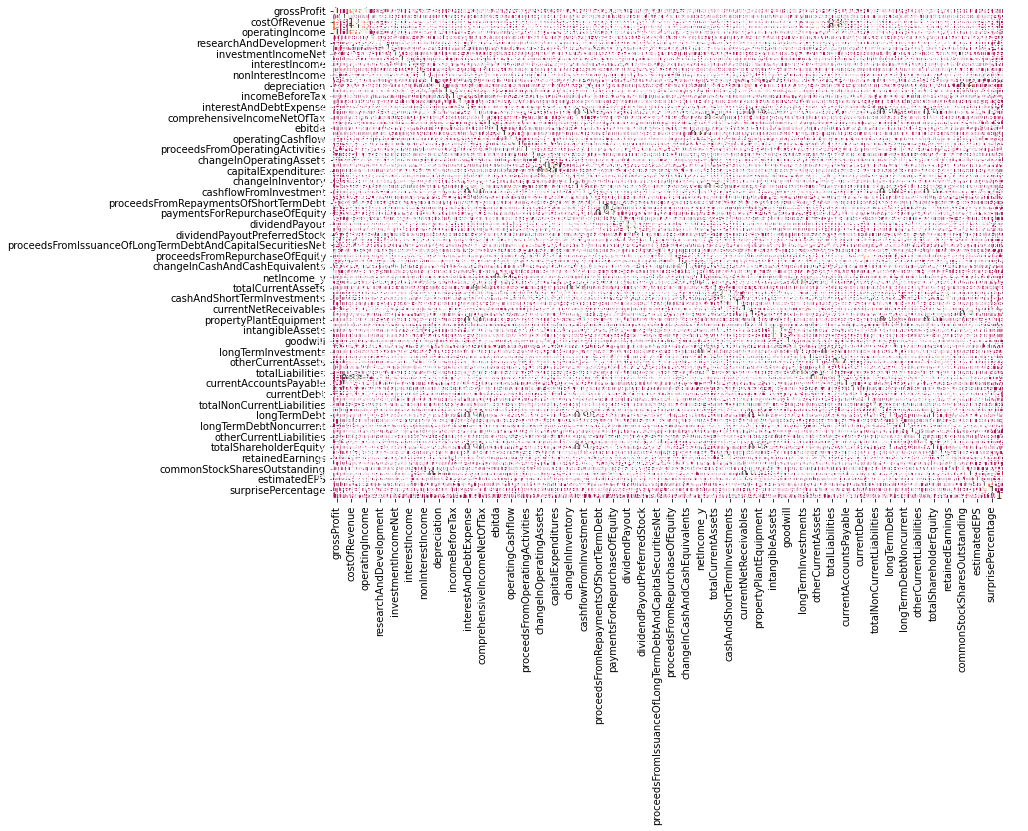

In [71]:
# correlation calculation
feature_corr = final_df.copy().corr()

# Then, print correlation of 'Sale Price' with other features from 'feature_corr' and sort  in descending order
#  ===== YOUR CODE HERE ==========
sortedDesc = feature_corr["1m"].sort_values(ascending=False) 
print(sortedDesc.head(10))

#cf_matrix = confusion_matrix(feature_corr)
plt.figure(figsize = (12,9))
sns.heatmap(feature_corr, annot=True, cbar=False, )

In [72]:
cols_extract = sortedDesc[0: 6].keys()
print(cols_extract)

df_to_export = final_df[cols_extract]
df_to_export["symbol"] = final_df["Symbol"]
print(df_to_export)

df_to_export.to_csv(r'../client/data/topFiveFeats211207.csv', sep= ",", index = False)

Index(['1m', 'reportedEPS', 'totalNonCurrentAssets', 'depreciation',
       'proceedsFromRepaymentsOfShortTermDebt', 'currentAccountsPayable'],
      dtype='object')
            1m  reportedEPS  totalNonCurrentAssets  depreciation  \
0     0.057445     0.055276               0.005213      0.024739   
1    -0.017731     0.077922               0.021905      0.016393   
2     0.044908    -0.060606               0.000990     -0.005764   
3     0.064792     0.103746              -0.024971      0.024739   
4    -0.033908     0.000000               0.017949      0.024739   
...        ...          ...                    ...           ...   
3957 -0.059842     1.495405               0.025598      0.101167   
3958 -0.047410     0.082840               0.013925      0.024739   
3959  0.085790     0.000000              -0.008528     -0.010056   
3960  0.103167     0.013274              -0.004218      0.050555   
3961  0.104979     0.000000               0.000000      0.000000   

      proceedsFro

C:\Users\Asus\AppData\Local\Temp/ipykernel_4788/4222085095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_export["symbol"] = final_df["Symbol"]
